In [156]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [157]:
house = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')

# Exploring Data

In [158]:
pd.options.display.max_columns = None
house.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [159]:
house.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
1455         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
1456         Lvl    AllPub    Inside       Gtl       NWAmes       Norm   
1457         Lvl    AllPub    Inside       Gtl      Crawfor       Norm   
1458         Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1459         Lvl    AllPub    Inside       Gtl      Edwards       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
1455       Norm     1Fam     2Story            6            5       1999   
1456       Norm     1Fam     1Story            6            6       1978   
1457       Norm     1Fam     2Story            7            9       1941   
1458       Norm     1Fam     1Story            5            6       1950   
1459       Norm     1Fam     1Story            5            6       1965   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
1455          2000     Gable  CompShg     VinylSd     VinylSd       None   
1456          1988     Gable  CompShg     Plywood     Plywood      Stone   
1457          2006     Gable  CompShg     CemntBd     CmentBd       None   
1458          1996       Hip  CompShg     MetalSd     MetalSd       None   
1459          1965     Gable  CompShg     HdBoard     HdBoard       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
1455         0.0        TA        TA      PConc       Gd       TA   
1456       119.0        TA        TA     CBlock       Gd       TA   
1457         0.0        Ex        Gd      Stone       TA       Gd   
1458         0.0        TA        TA     CBlock       TA       TA   
1459         0.0        Gd        TA     CBlock       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1455           No          Unf           0          Unf           0   
1456           No          ALQ         790          Rec         163   
1457           No          GLQ         275          Unf           0   
1458           Mn          GLQ          49          Rec        1029   
1459           No          BLQ         830          LwQ         290   

      BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
1455        953          953    GasA        Ex          Y      SBrkr   
1456        589         1542    GasA        TA          Y      SBrkr   
1457        877         1152    GasA        Ex          Y      SBrkr   
1458          0         1078    GasA        Gd          Y      FuseA   
1459        136         1256    GasA        Gd          Y      SBrkr   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
1455       953       694             0       1647             0             0   
1456      2073         0             0       2073             1             0   
1457      1188      1152             0       2340             0             0   
1458      1078         0             0       1078             1             0   
1459      1256         0             0       1256             1             0   

      FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
1455         2         1             3             1          TA   
1456         2         0             3             1          TA   
1457         2         0             4             1          Gd   
1458         1         0             2             1          Gd   
1459         1         1             3             1          TA   

   

In [160]:
house.shape

(1460, 81)

In [161]:
house.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

In [162]:
house.isna().sum().sort_values(ascending = False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtFinType2       38
BsmtExposure       38
BsmtQual           37
BsmtCond           37
BsmtFinType1       37
MasVnrArea          8
MasVnrType          8
Electrical          1
Id                  0
Functional          0
Fireplaces          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
HeatingQC 

#### the percentage of null values has exceeded the 50% of the data so that I'm gonna remove them

In [163]:
house.drop(['PoolQC','MiscFeature','Alley', 'Fence', 'FireplaceQu'], axis = 1,
            inplace = True)

In [164]:
house.fillna(house.median(), inplace=True)
house.fillna(house.mode().loc[0], inplace=True)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [165]:
num_cols = [col for col in house.columns if house[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in house.columns if house[col].dtype not in ['int64', 'float64']]

# EDA

In [166]:
house[num_cols].corr()

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.009921 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.356718 -0.139781     0.032628   
LotFrontage   -0.009921   -0.356718     1.000000  0.304522     0.234812   
LotArea       -0.033226   -0.139781     0.304522  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.234812  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.053281 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.116685  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.083348  0.013788     0.550684   
MasVnrArea    -0.051071    0.023573     0.178469  0.103321     0.407252   
BsmtFinSF1    -0.005024   -0.069836     0.214367  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.042463  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.124098 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.363472  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.413773  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.072388  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.037469  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.368007  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.090343  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333    -0.006979  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.180534  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.047222  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.236840  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.004905 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.320518  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.233221  0.271364     0.396765   
GarageYrBlt   -0.000122    0.081396     0.062996 -0.025865     0.514231   
GarageCars     0.016570   -0.040110     0.269539  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.323511  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.075542  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.137014  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.010287 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.061945  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.037655  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.180819  0.077672     0.065166   
MiscVal       -0.006242   -0.007683    -0.000255  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.010451  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.006380 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.334771  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.051071   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.023573   -0.069836   
LotFrontage      -0.053281   0.116685      0.083348    0.178469    0.214367   
LotArea          -0.005636   0.014228      0.013788    0.103321    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.407252    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.125694   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.311600    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.176529    0.128451   
MasVnrArea       -0.125694   0.311600      0.176529    1.000000    0.261256   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.261256    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.071330   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.113862   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.360067    0

In [167]:
pd.options.display.max_rows = None
house[num_cols].corrwith(house['SalePrice']).sort_values(ascending = False).head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
dtype: float64

In [168]:
index = house[num_cols].corrwith(house['SalePrice'])\
.sort_values(ascending = False).head(5).index

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f4a223eac20> (for post_execute):


KeyboardInterrupt: 

<Figure size 1600x1600 with 0 Axes>

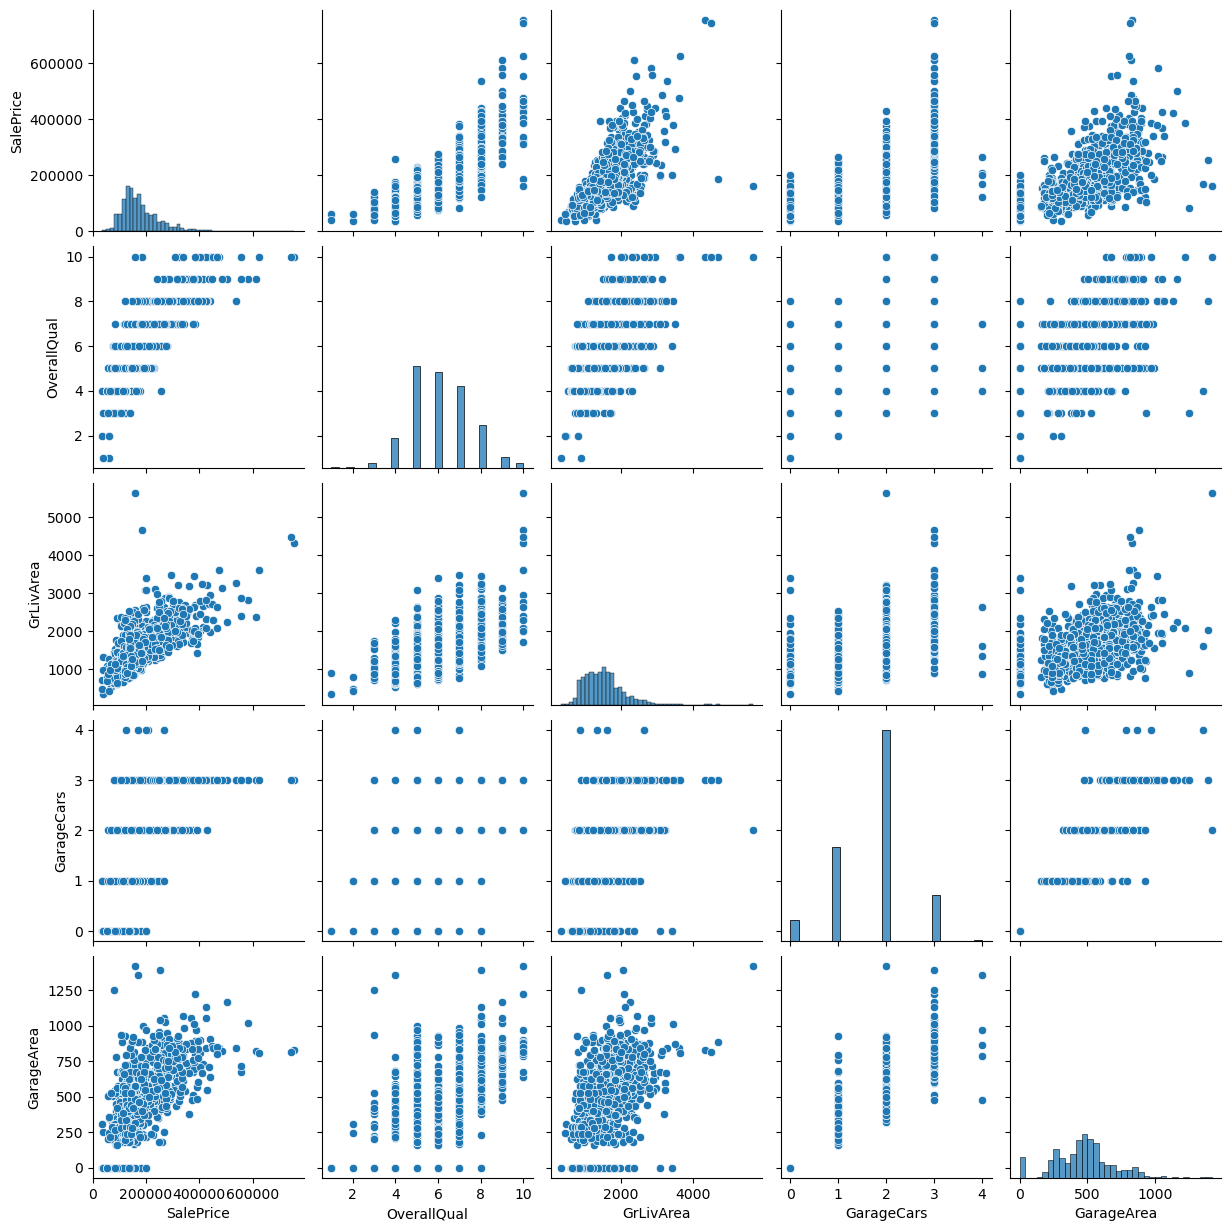

In [169]:
plt.figure(figsize=(16,16))
sns.pairplot(data = house[index])

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

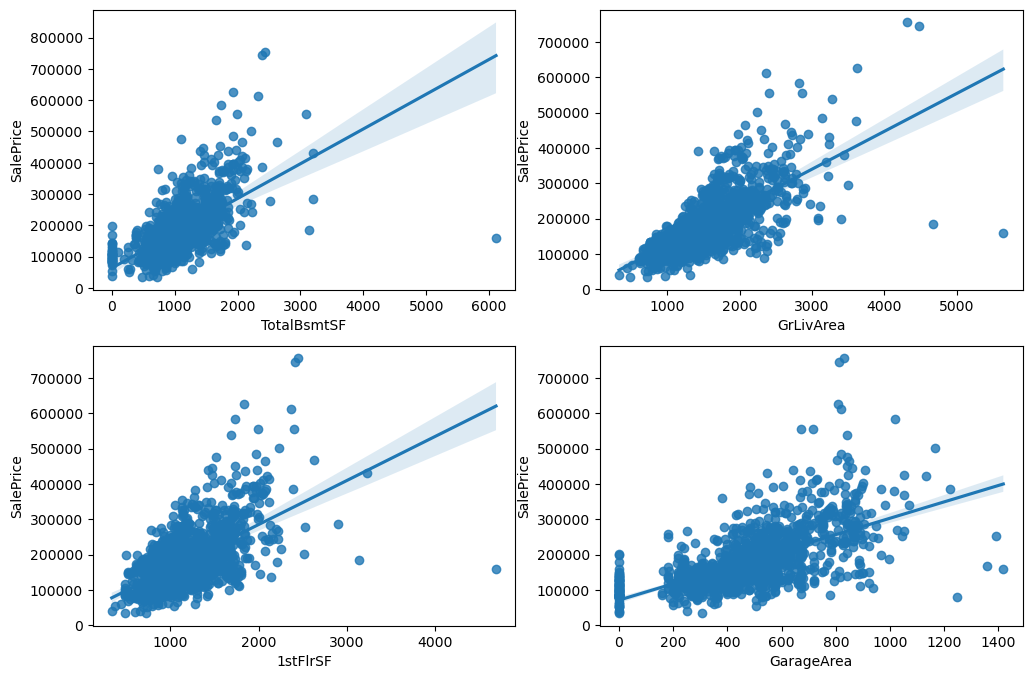

In [170]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.regplot(data=house, x='TotalBsmtSF', y='SalePrice', ax=axes[0,0])
sns.regplot(data=house, x='GrLivArea', y='SalePrice', ax=axes[0,1])
sns.regplot(data=house, x='1stFlrSF', y='SalePrice', ax=axes[1,0])
sns.regplot(data=house, x='GarageArea', y='SalePrice', ax=axes[1,1])

In [171]:
house = house.drop(house[(house['GrLivArea']>4000) & (house['SalePrice']<300000)].index)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


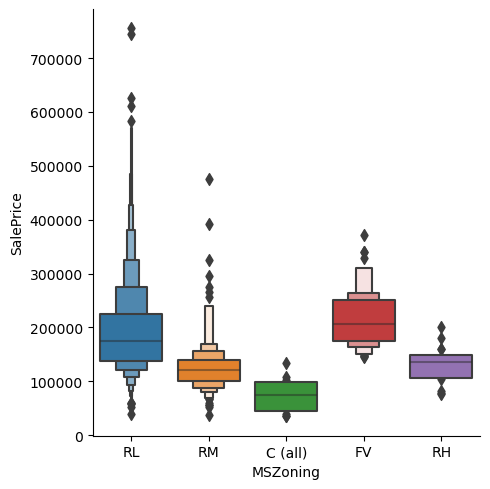

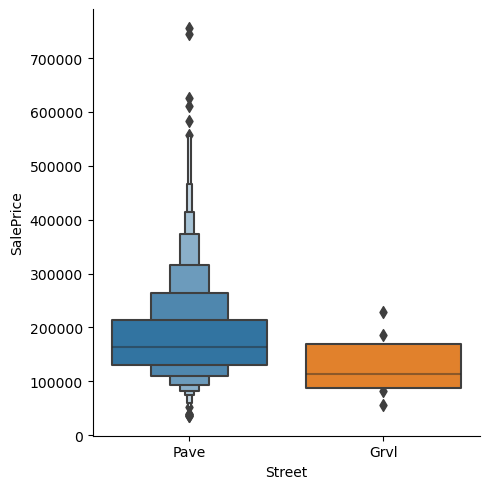

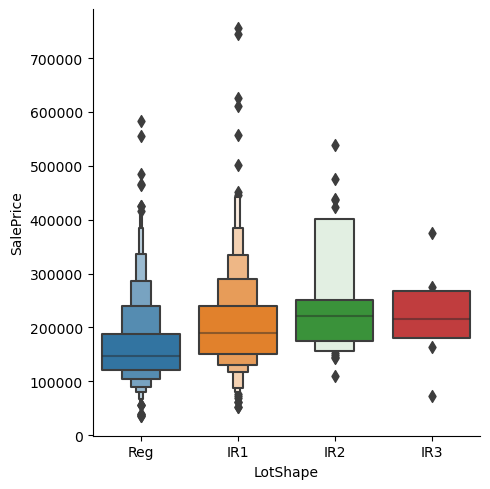

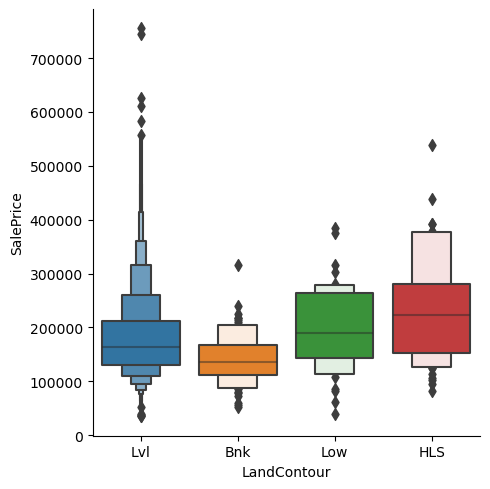

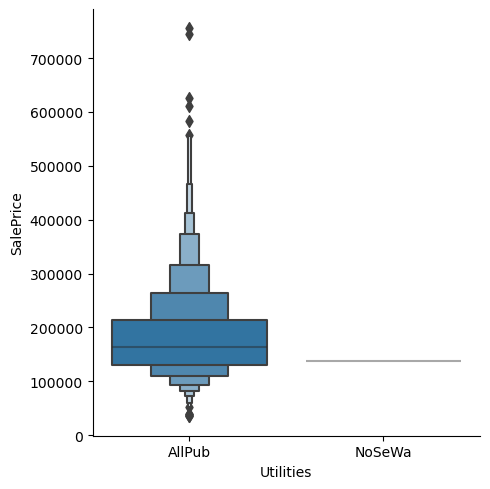

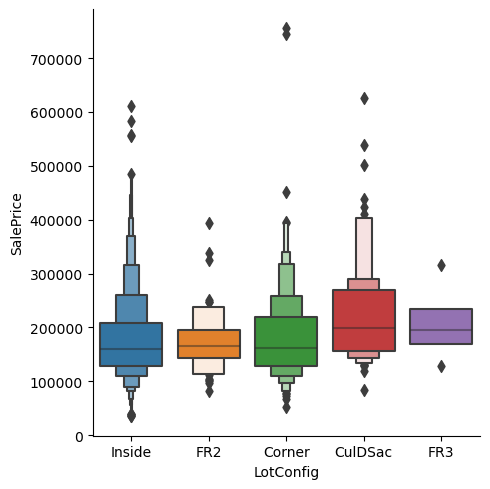

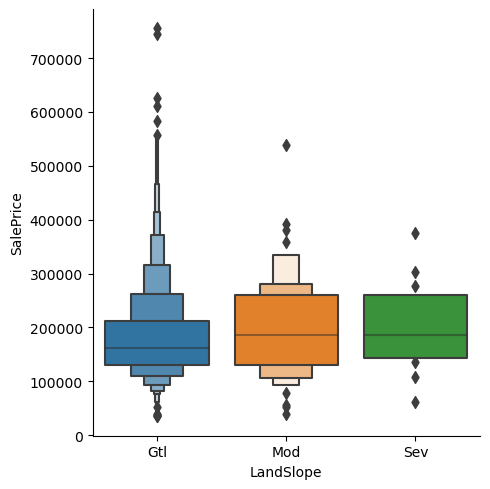

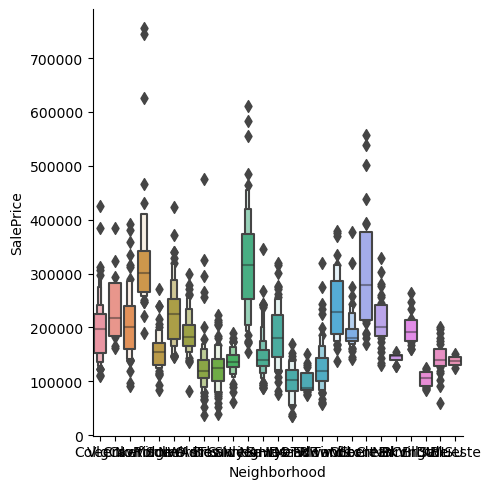

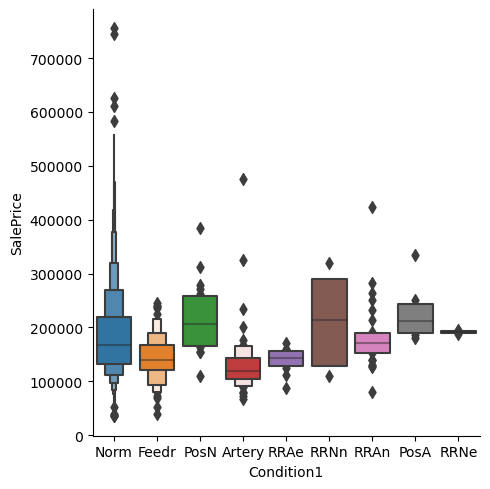

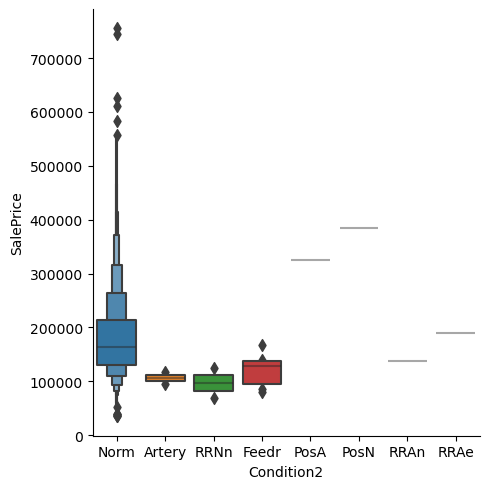

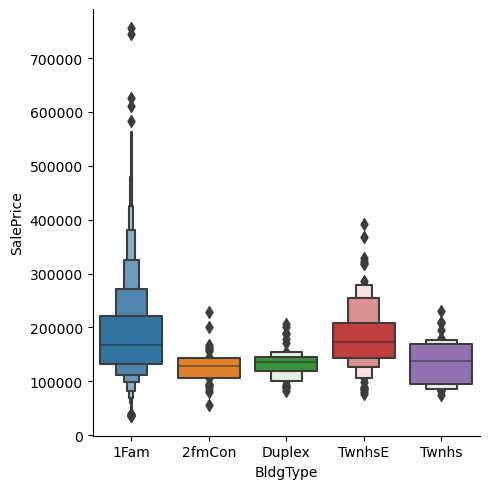

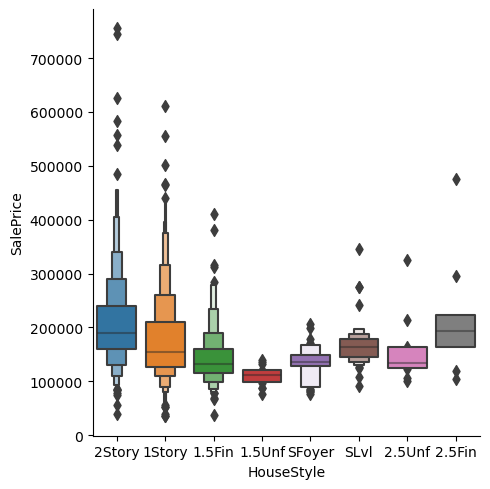

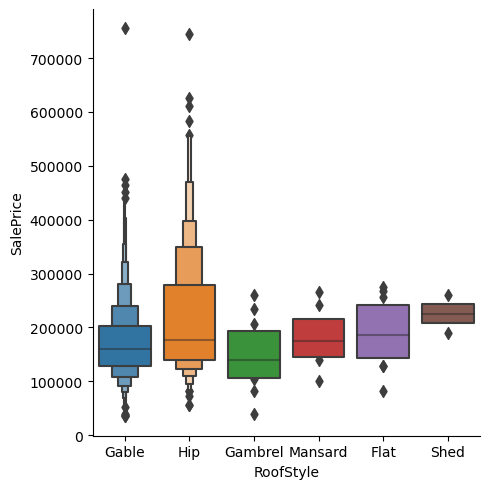

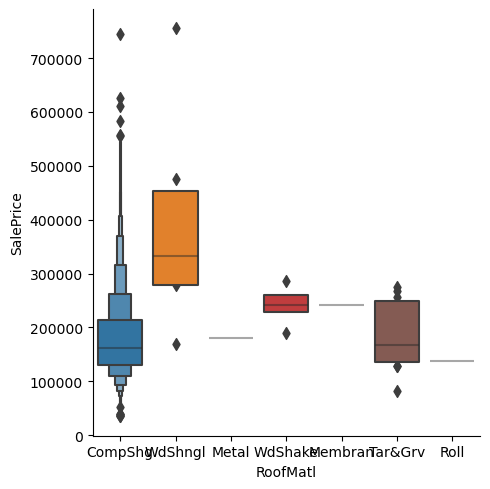

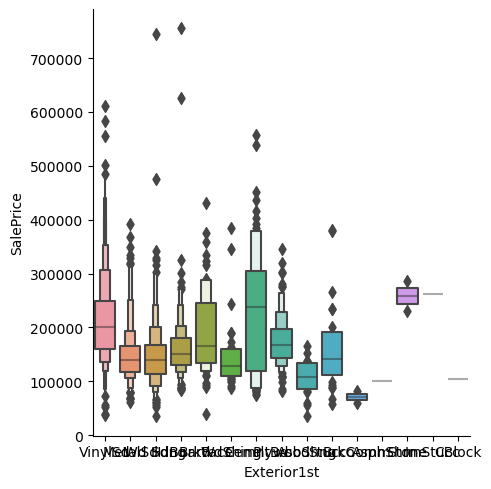

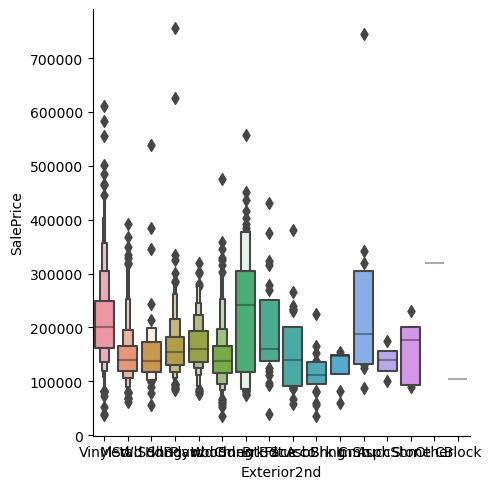

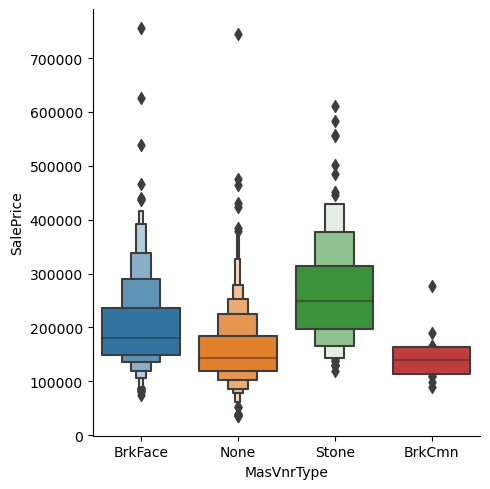

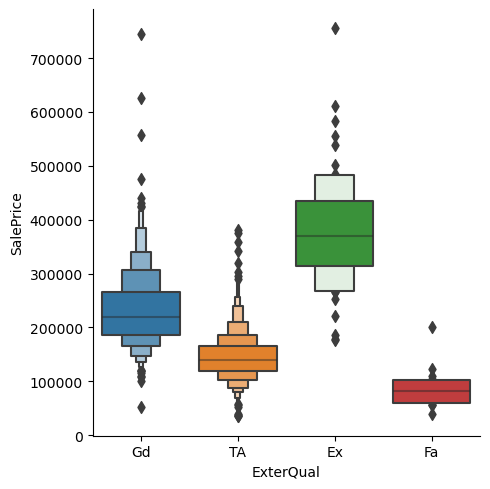

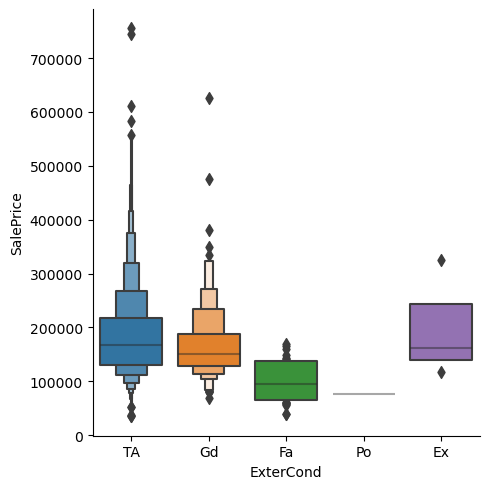

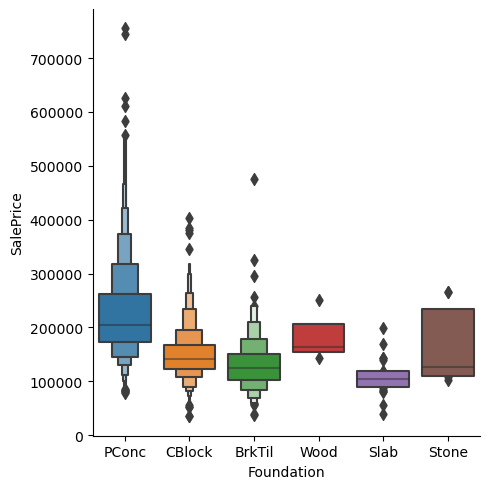

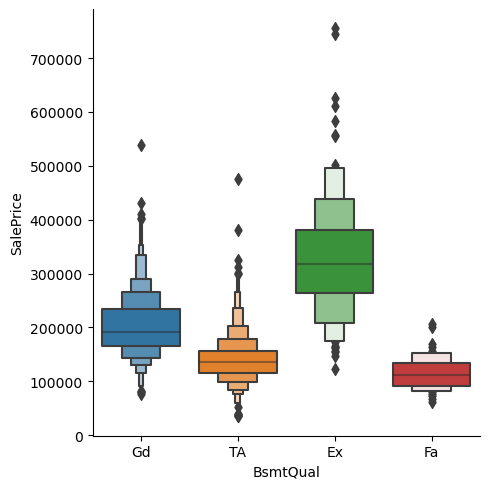

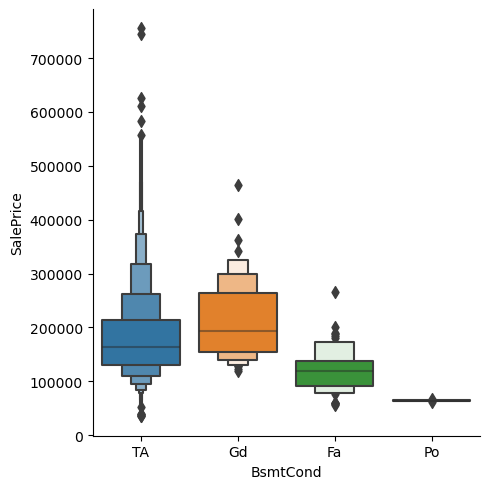

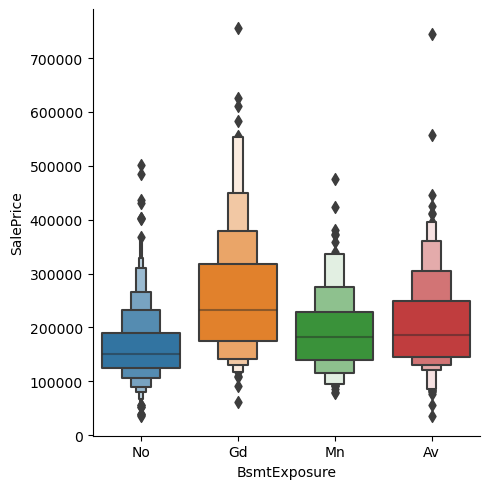

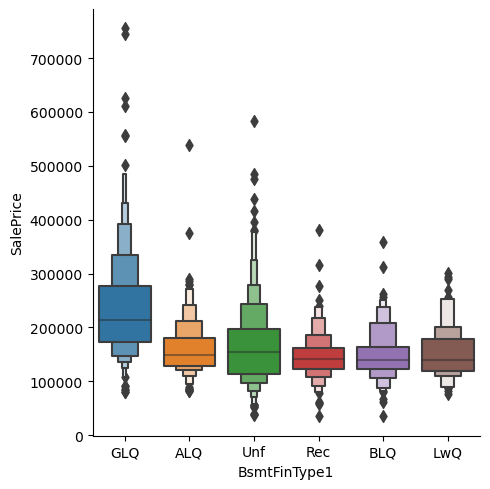

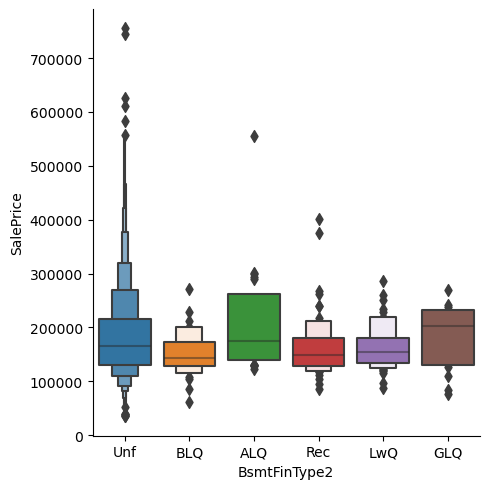

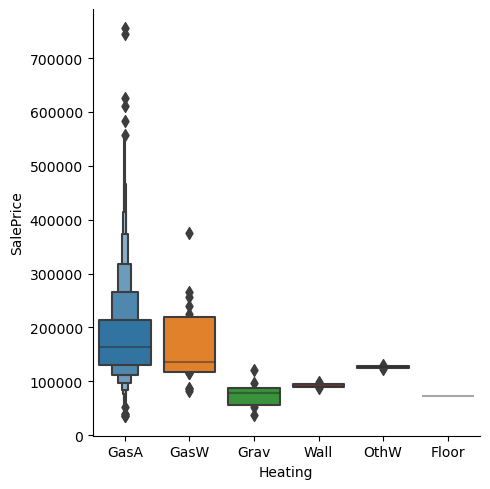

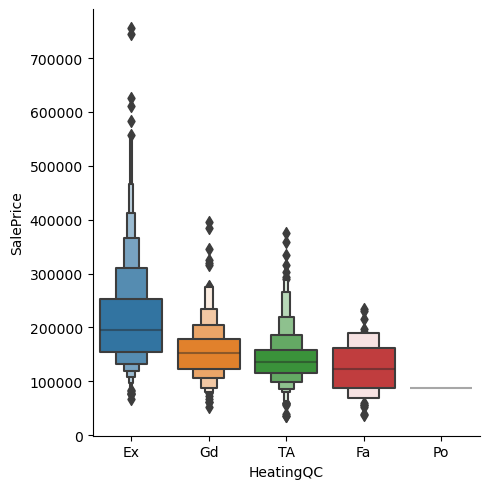

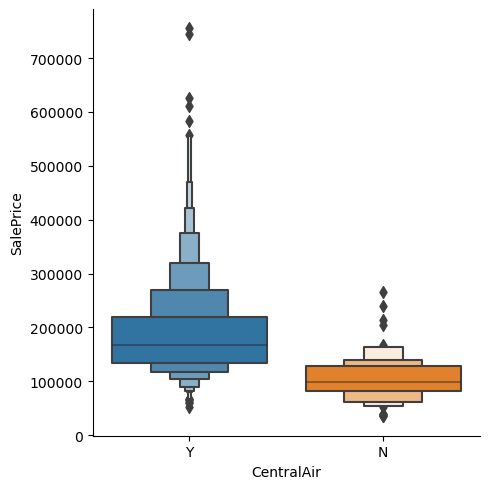

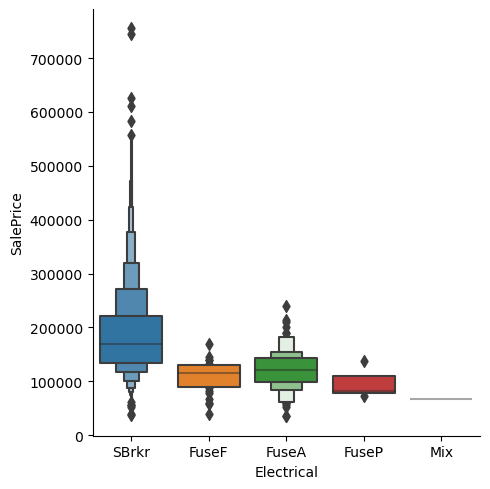

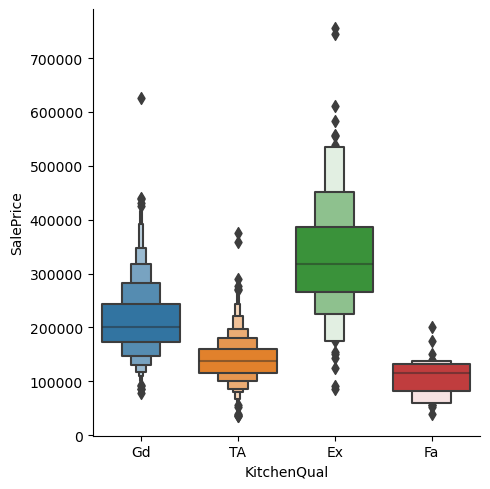

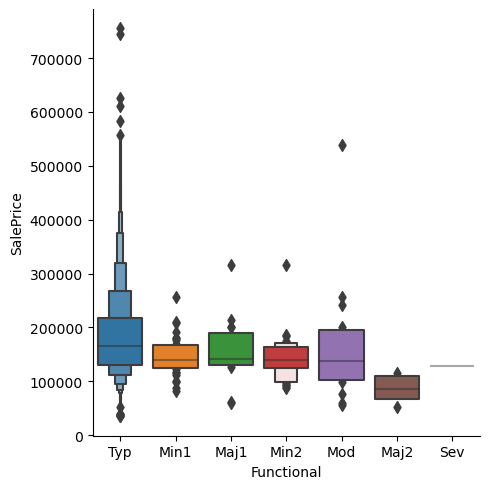

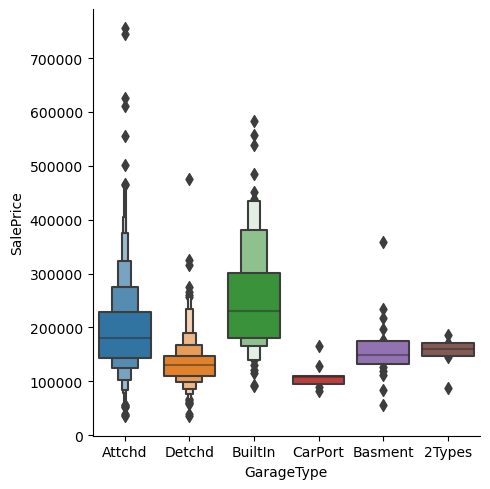

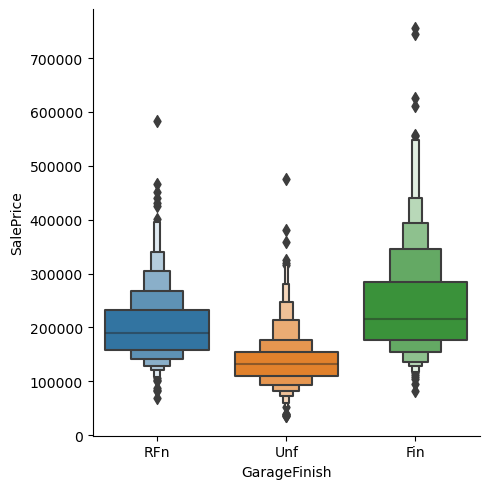

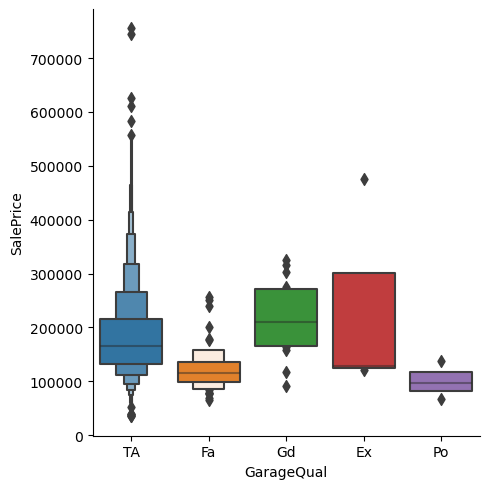

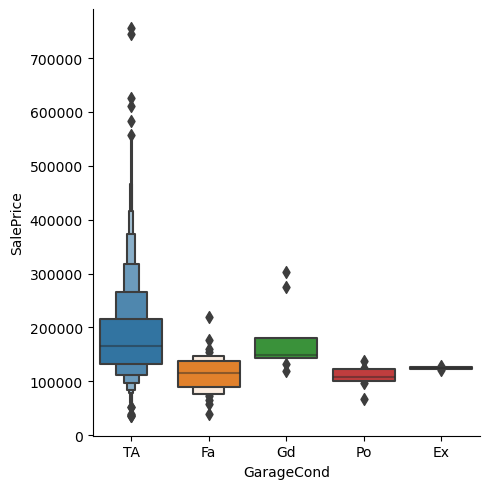

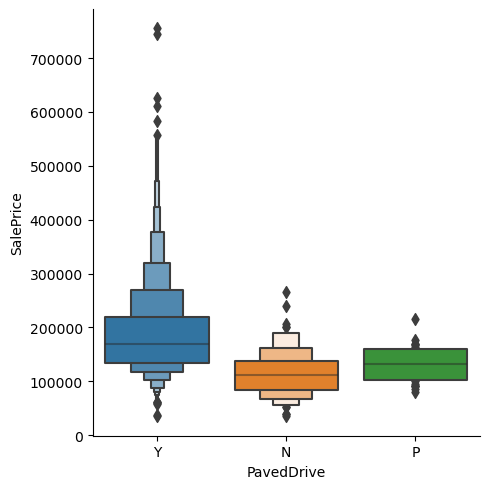

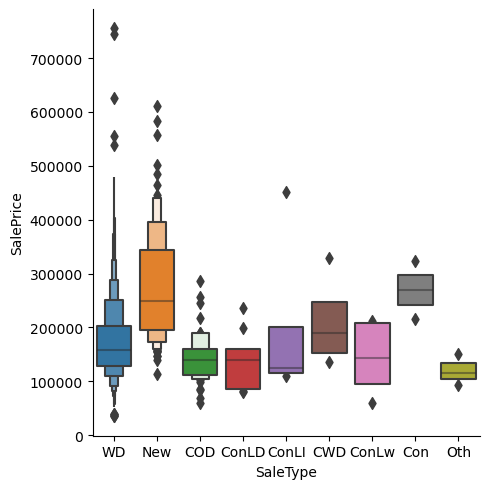

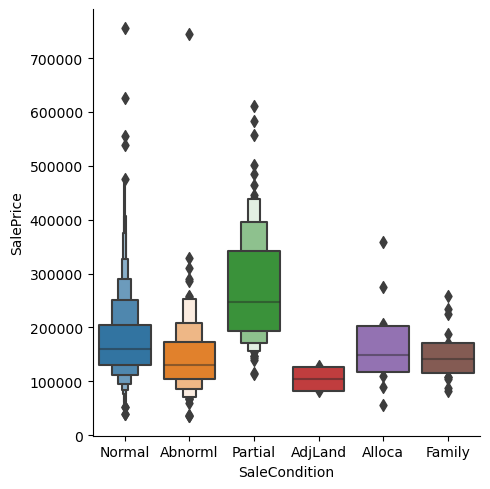

In [172]:
for feature in cat_cols:
    sns.catplot(data=house, x=feature, y='SalePrice', kind="boxen")

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:447: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


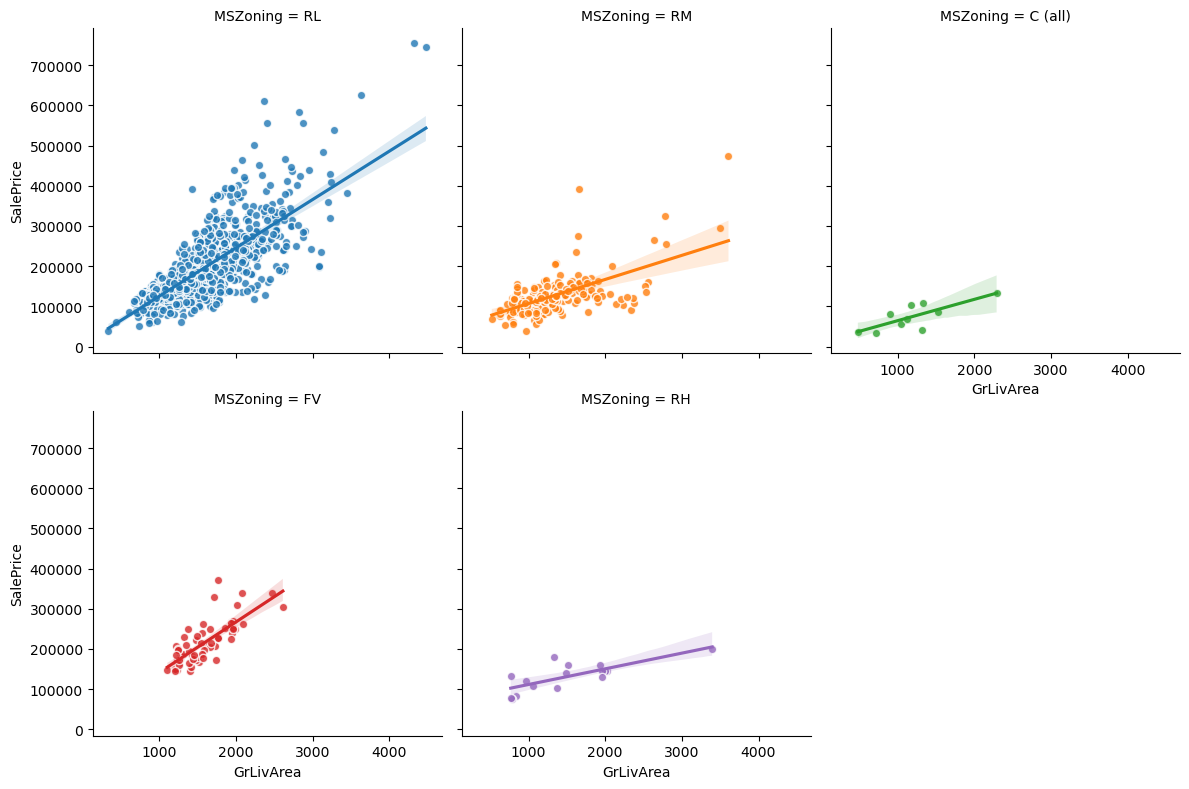

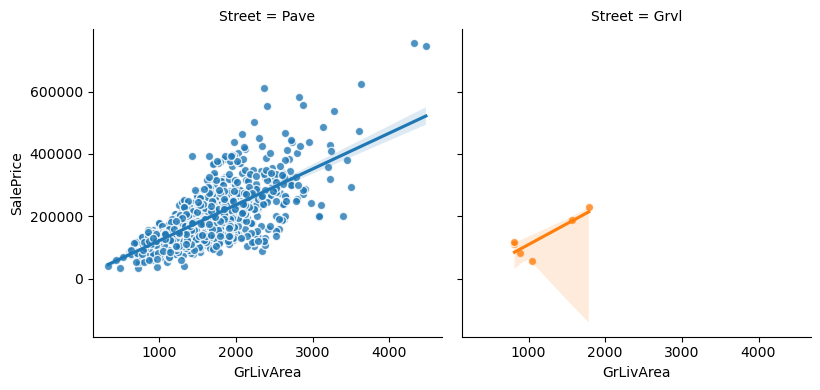

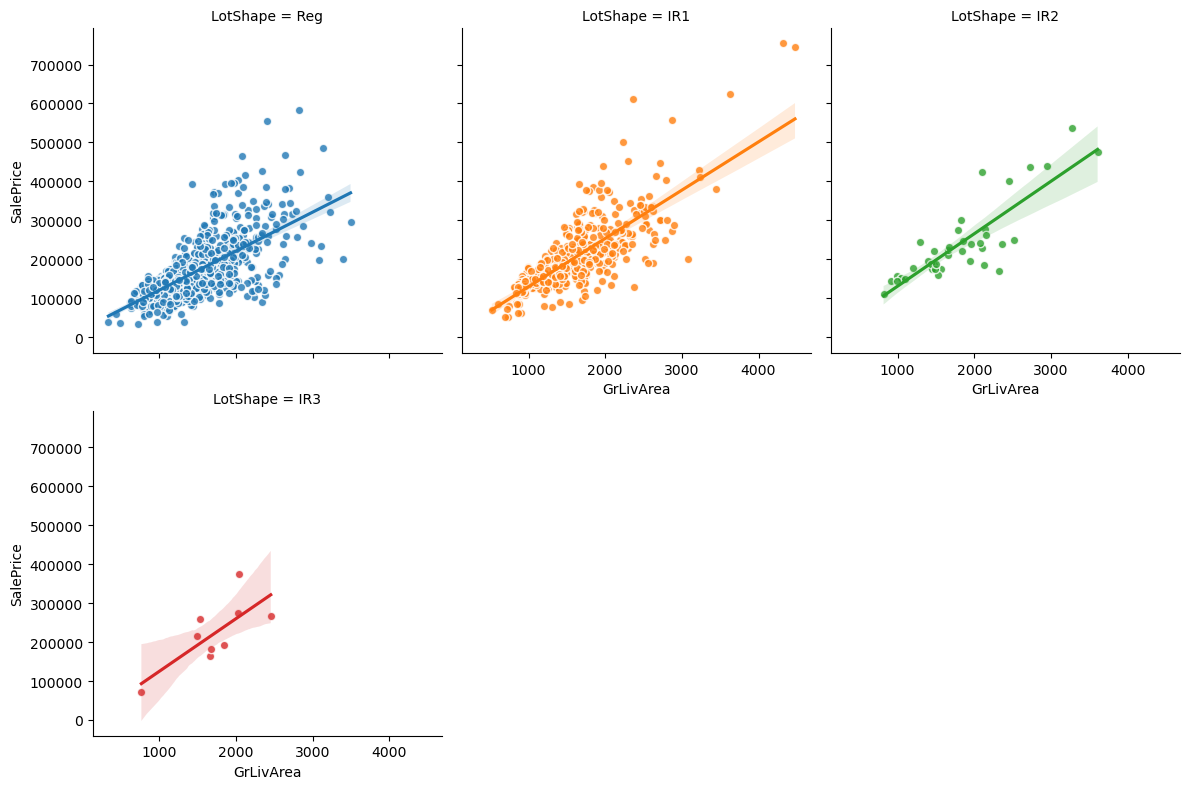

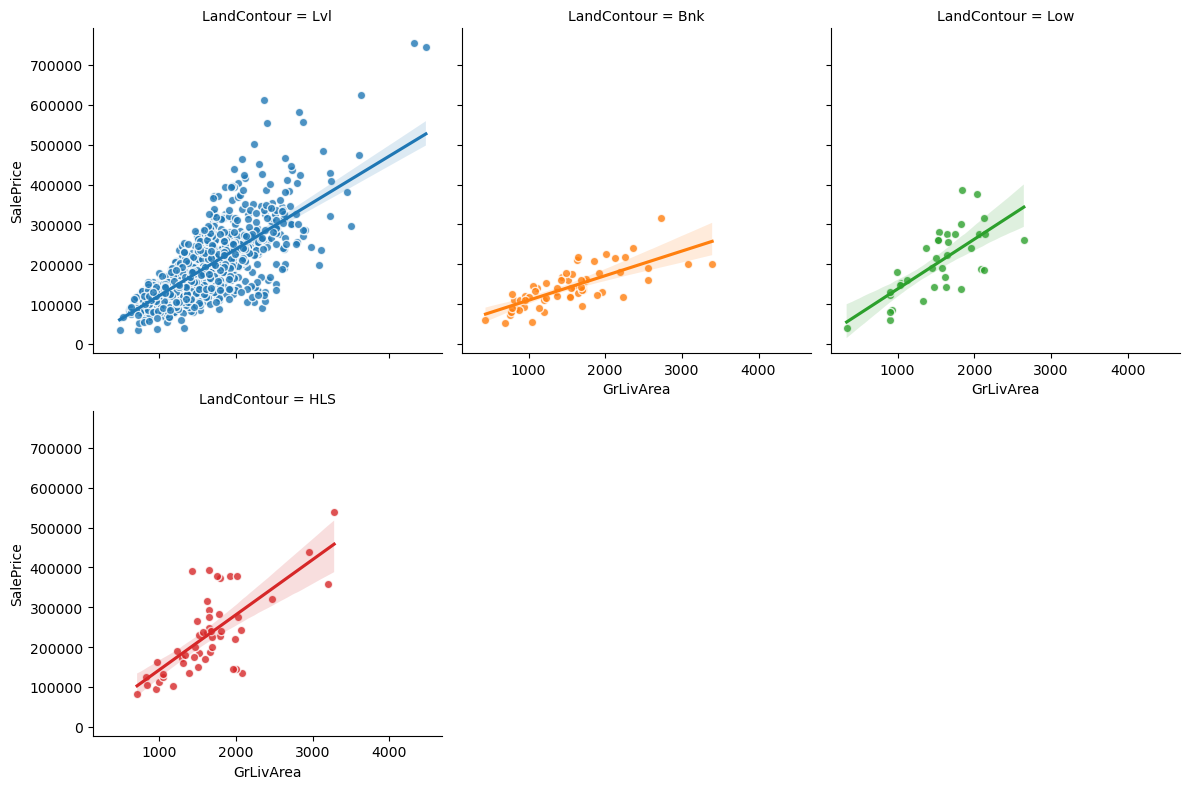

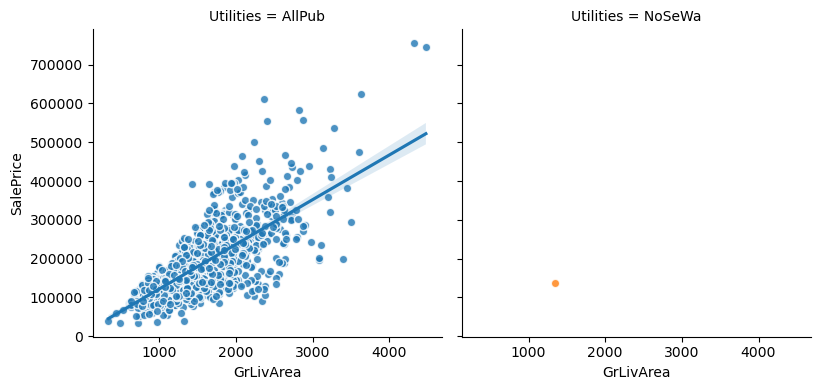

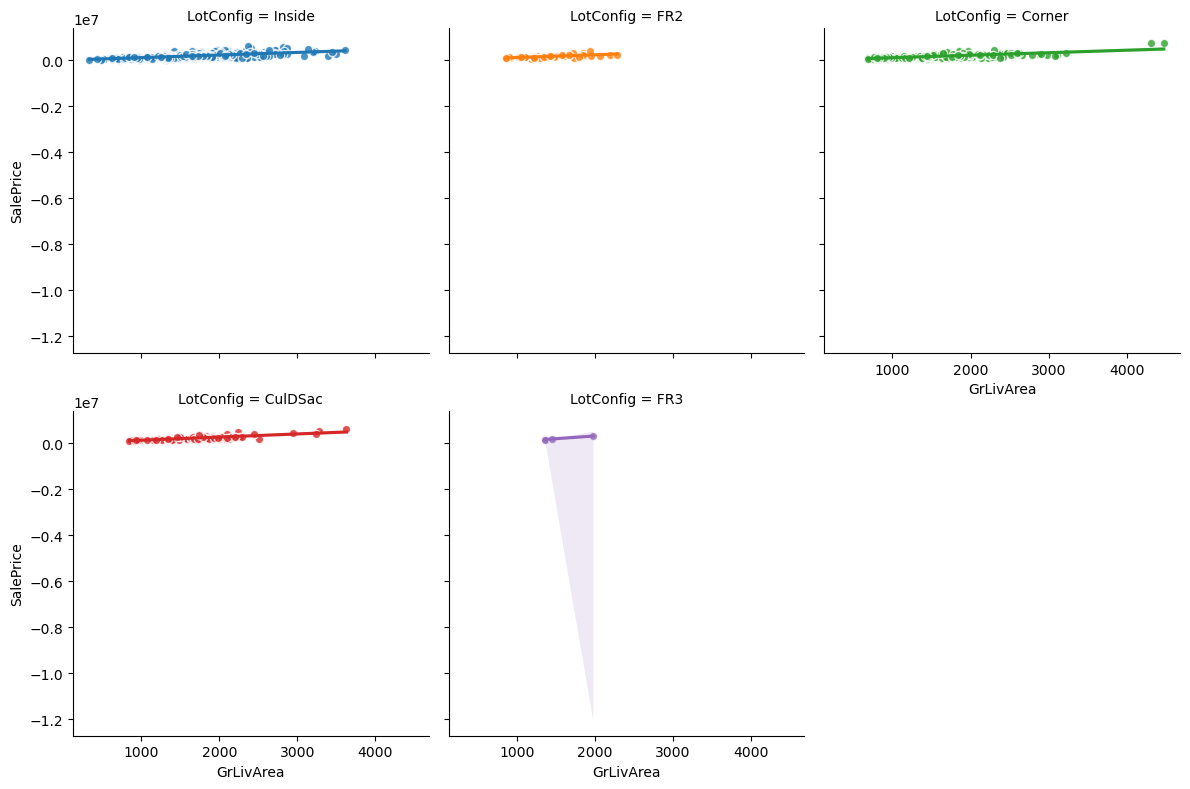

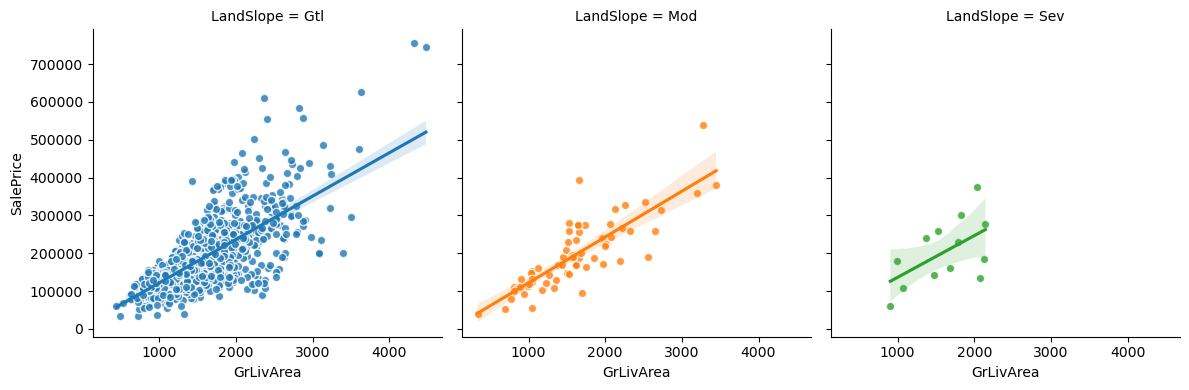

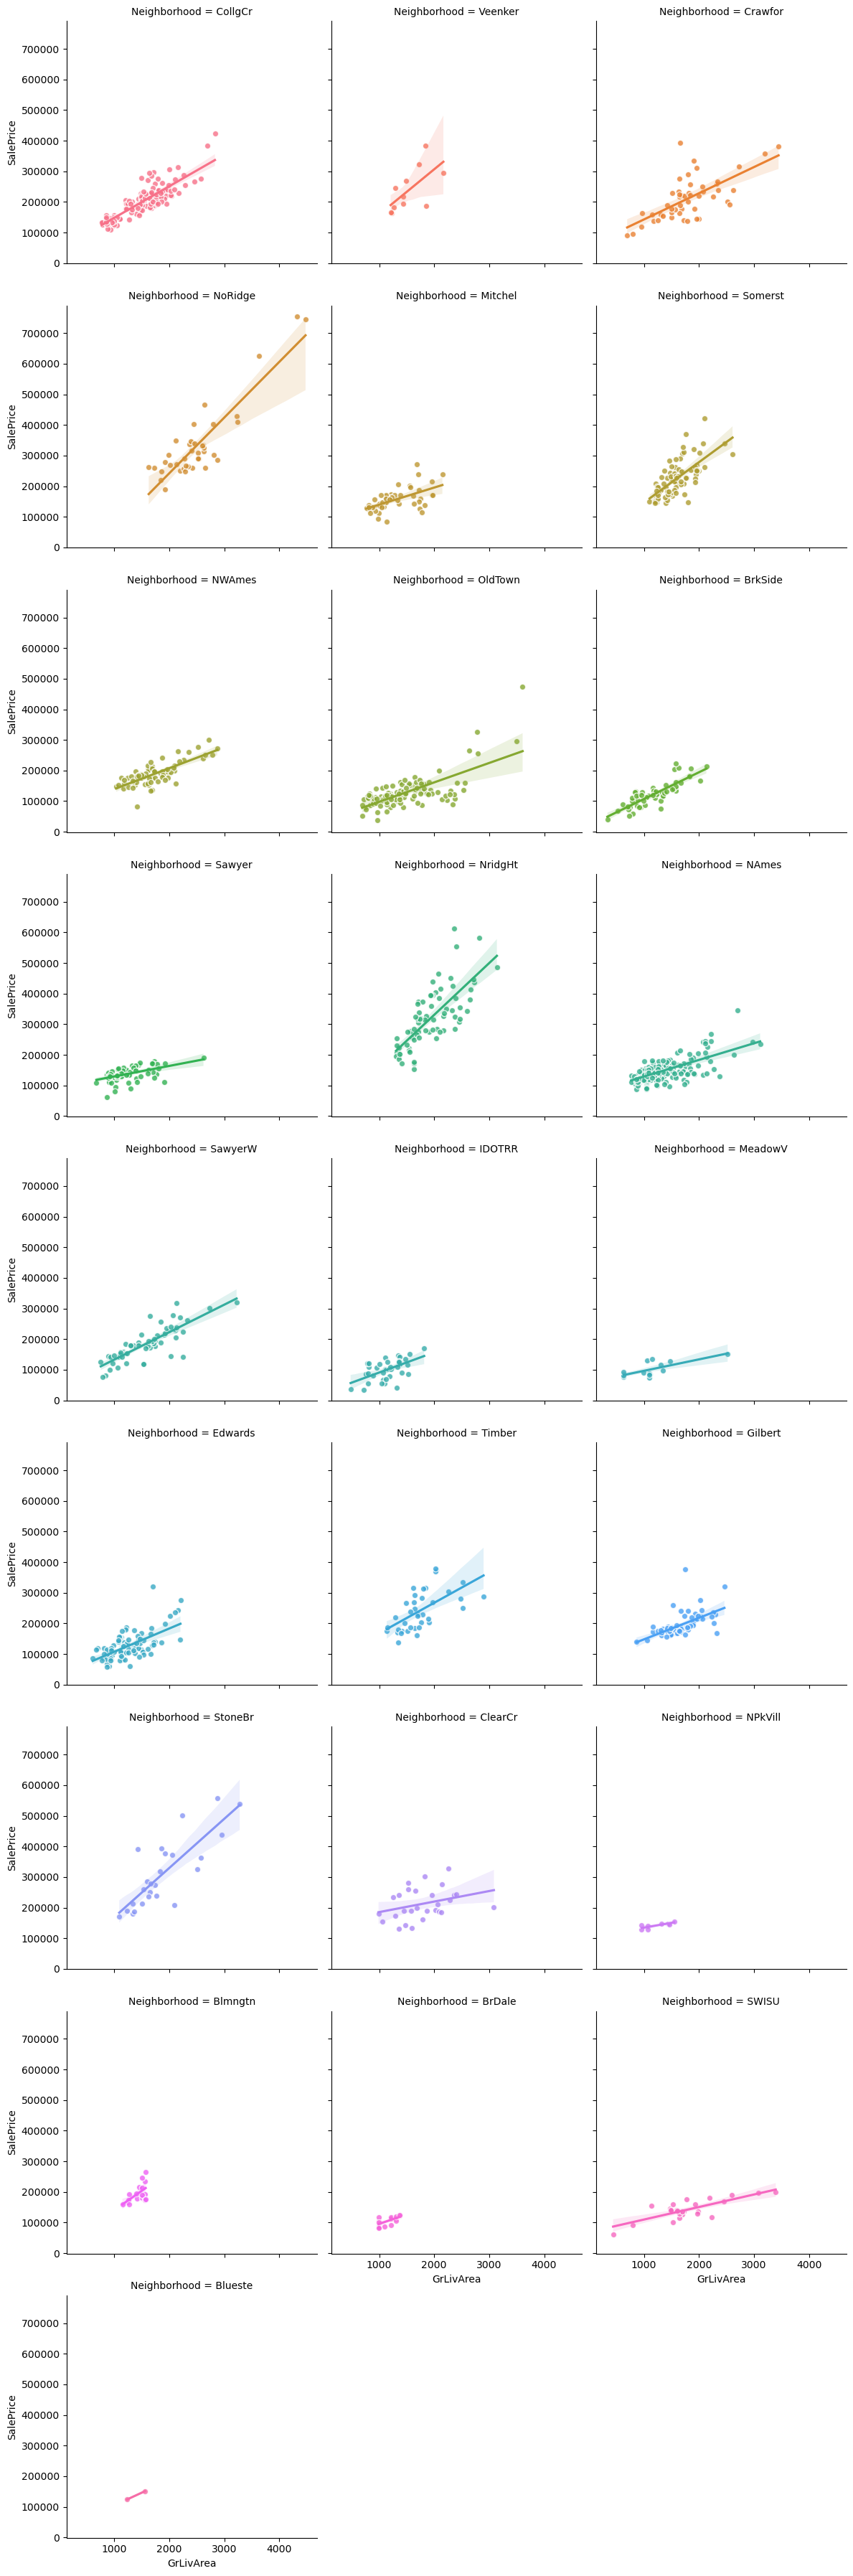

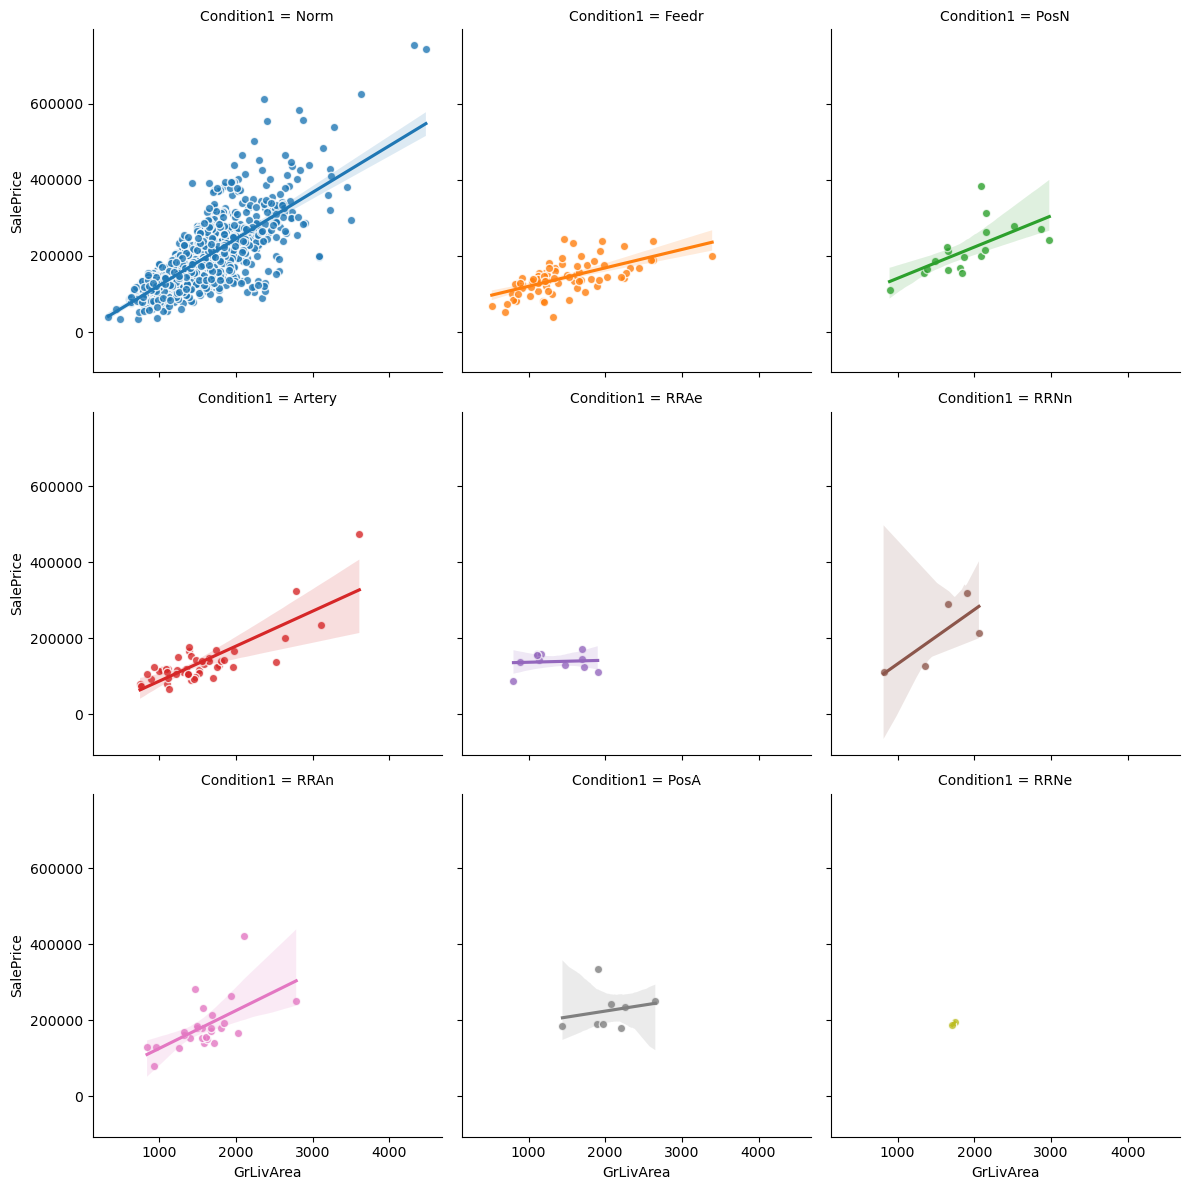

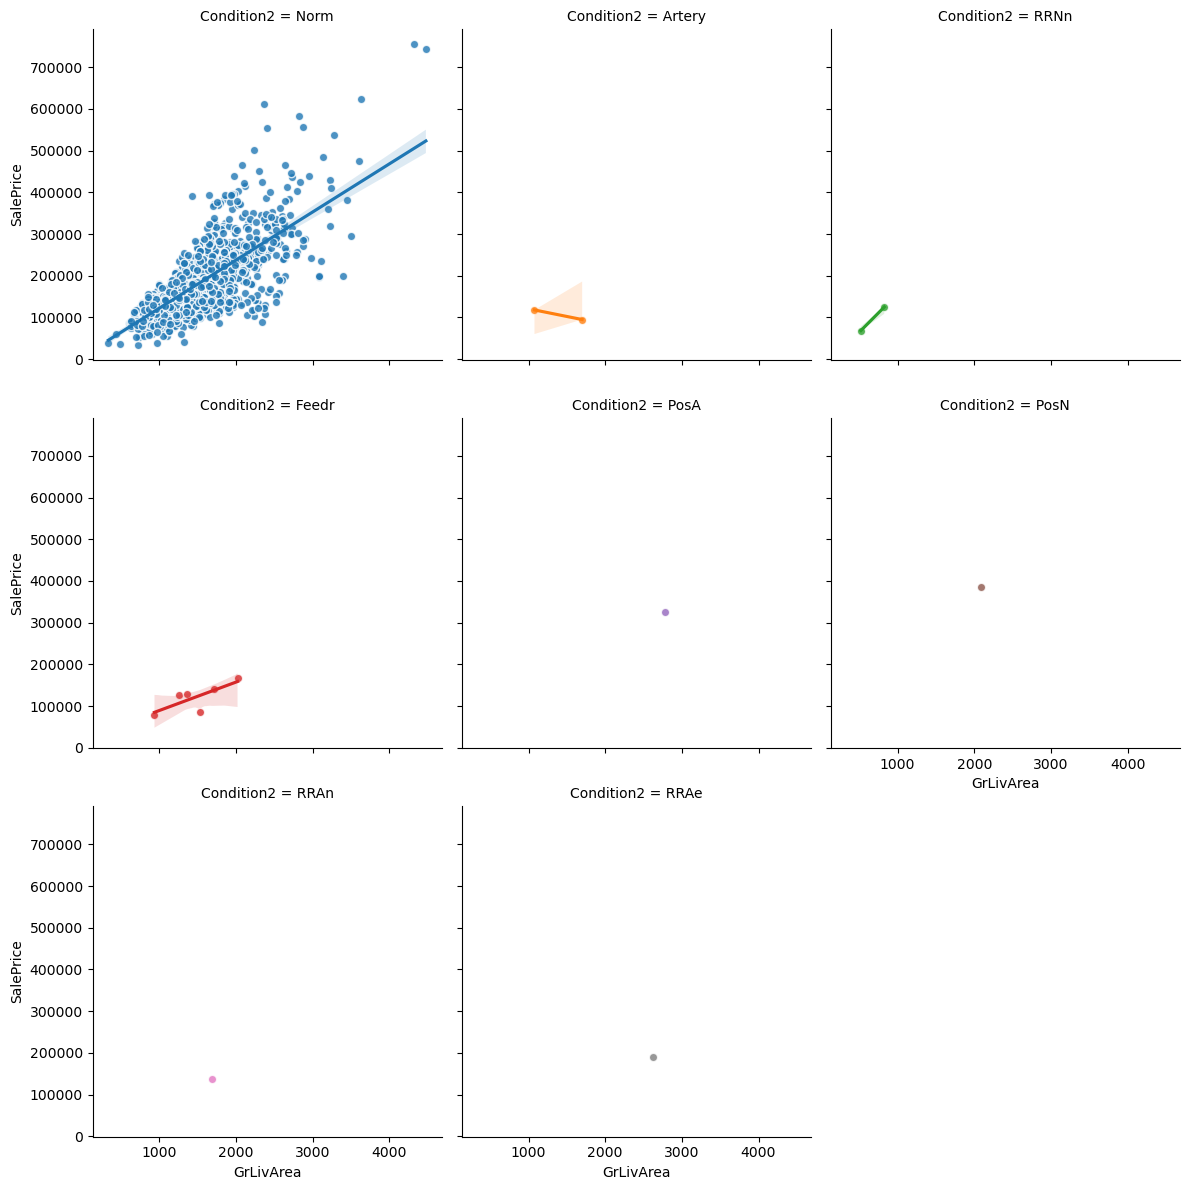

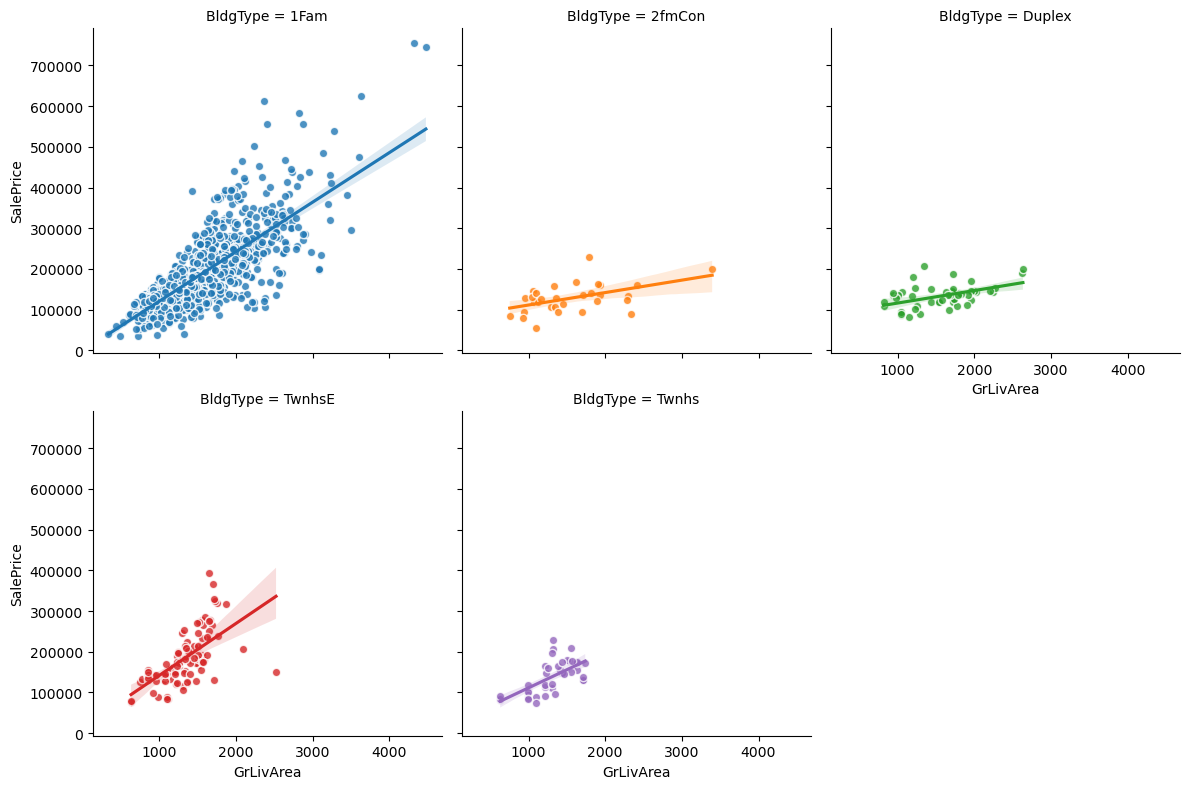

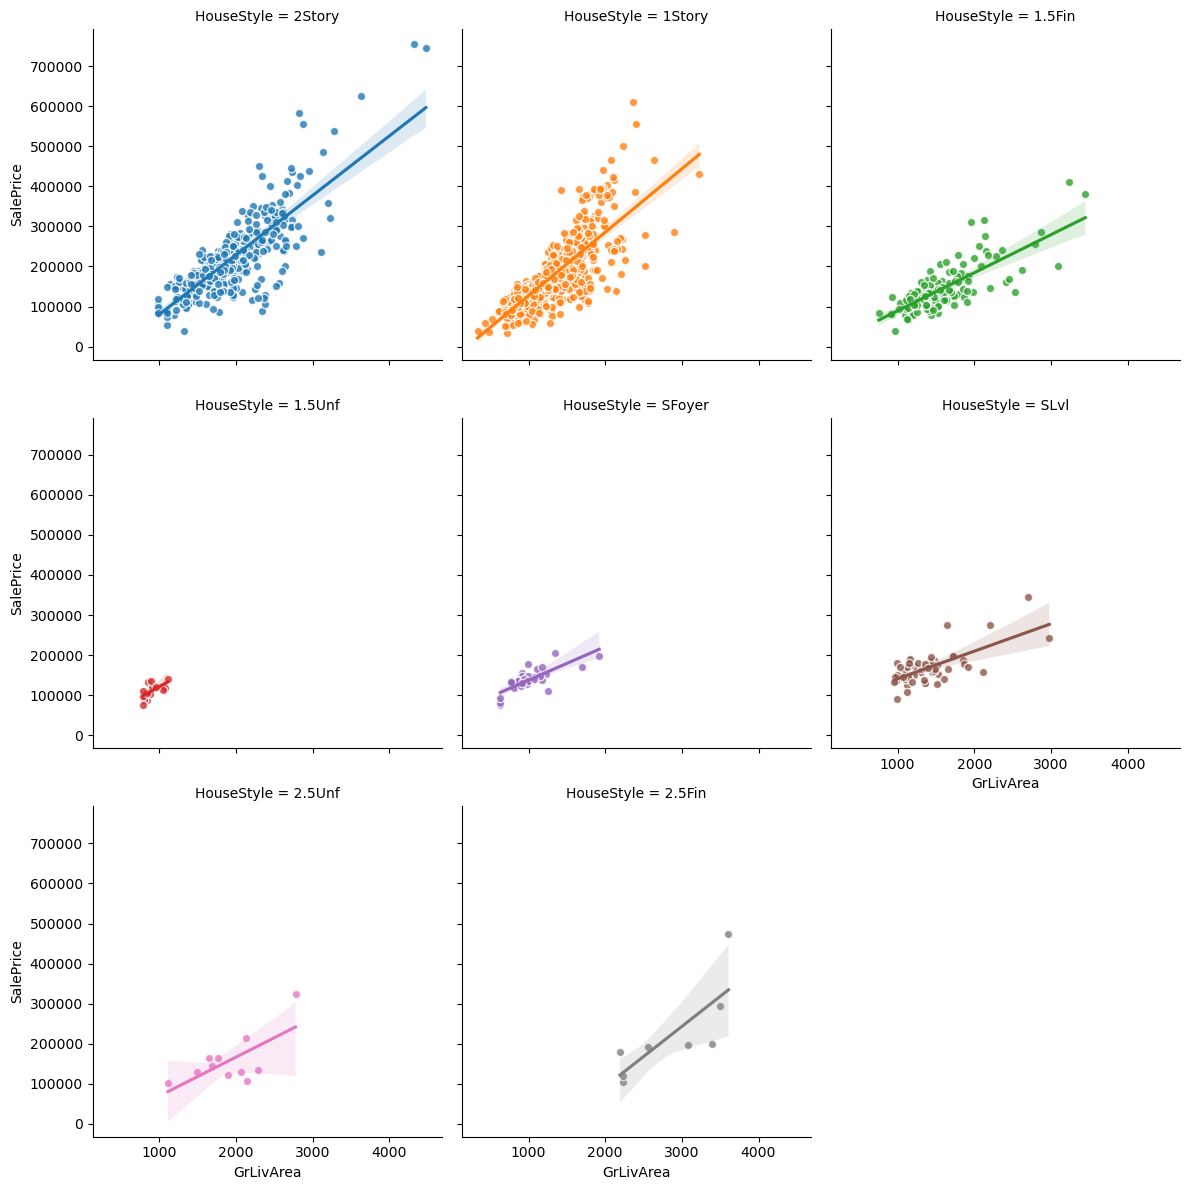

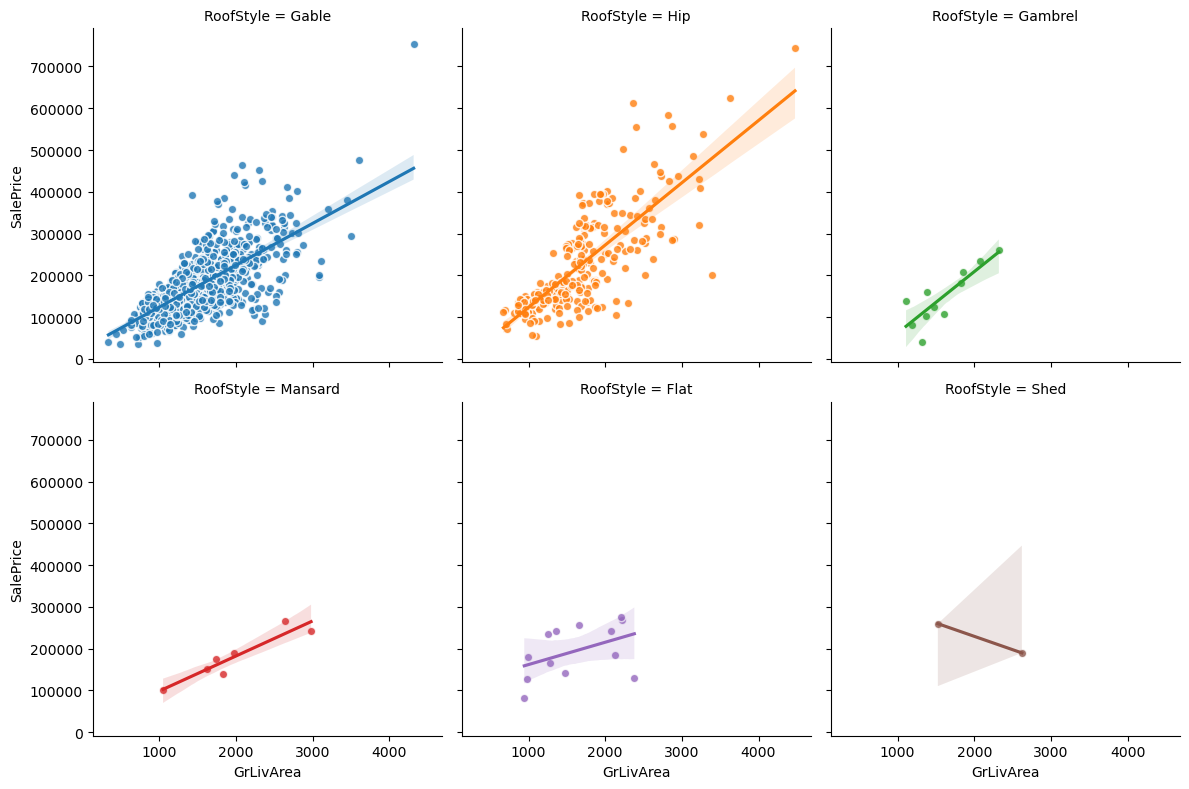

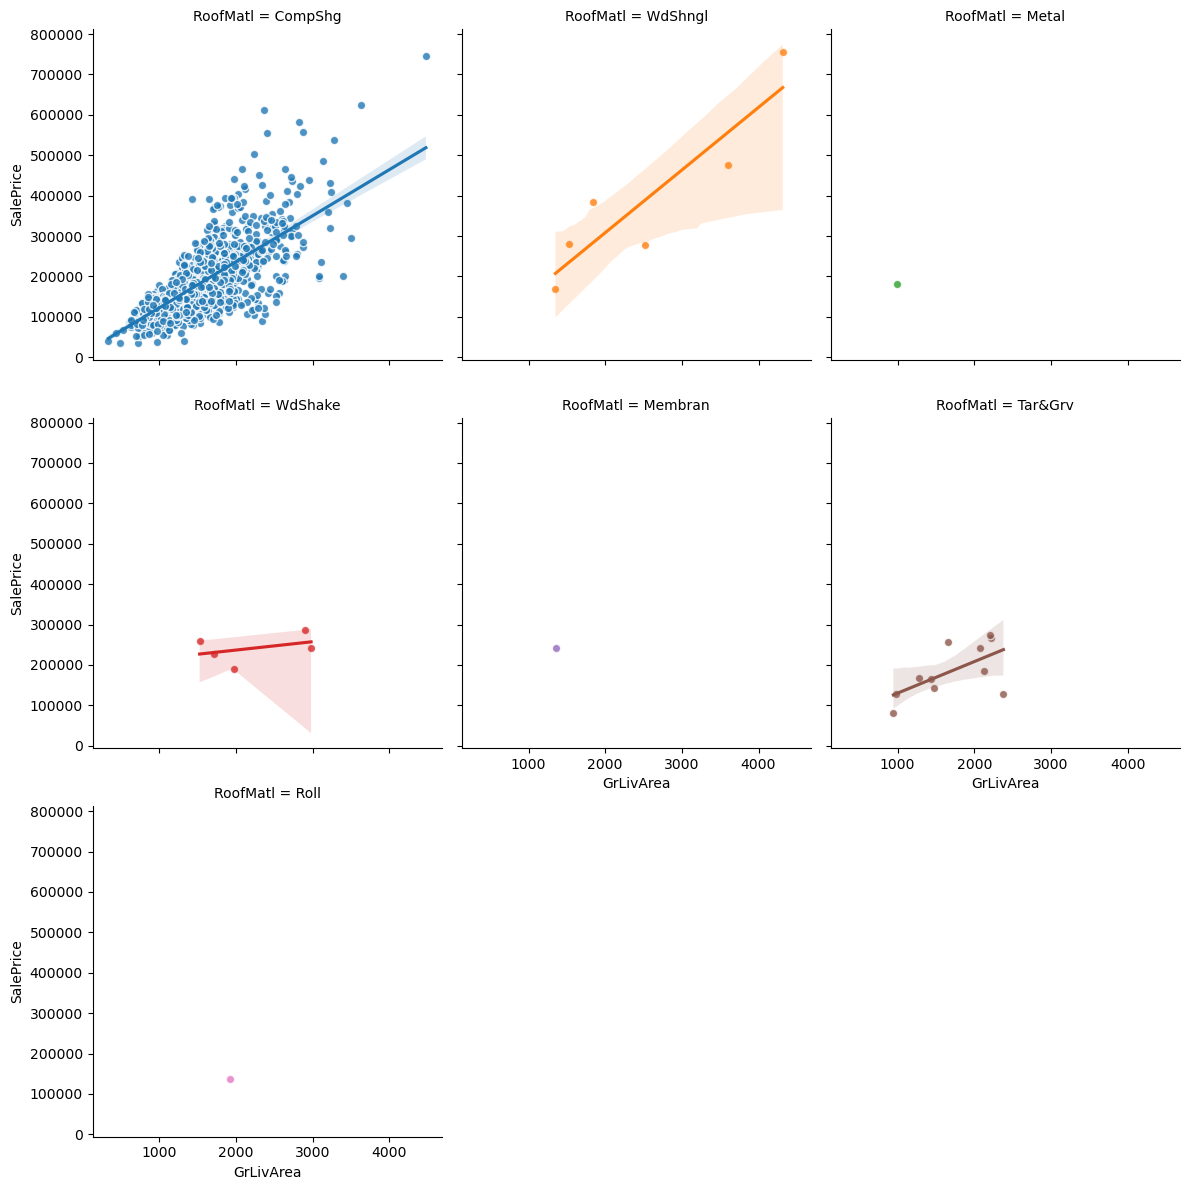

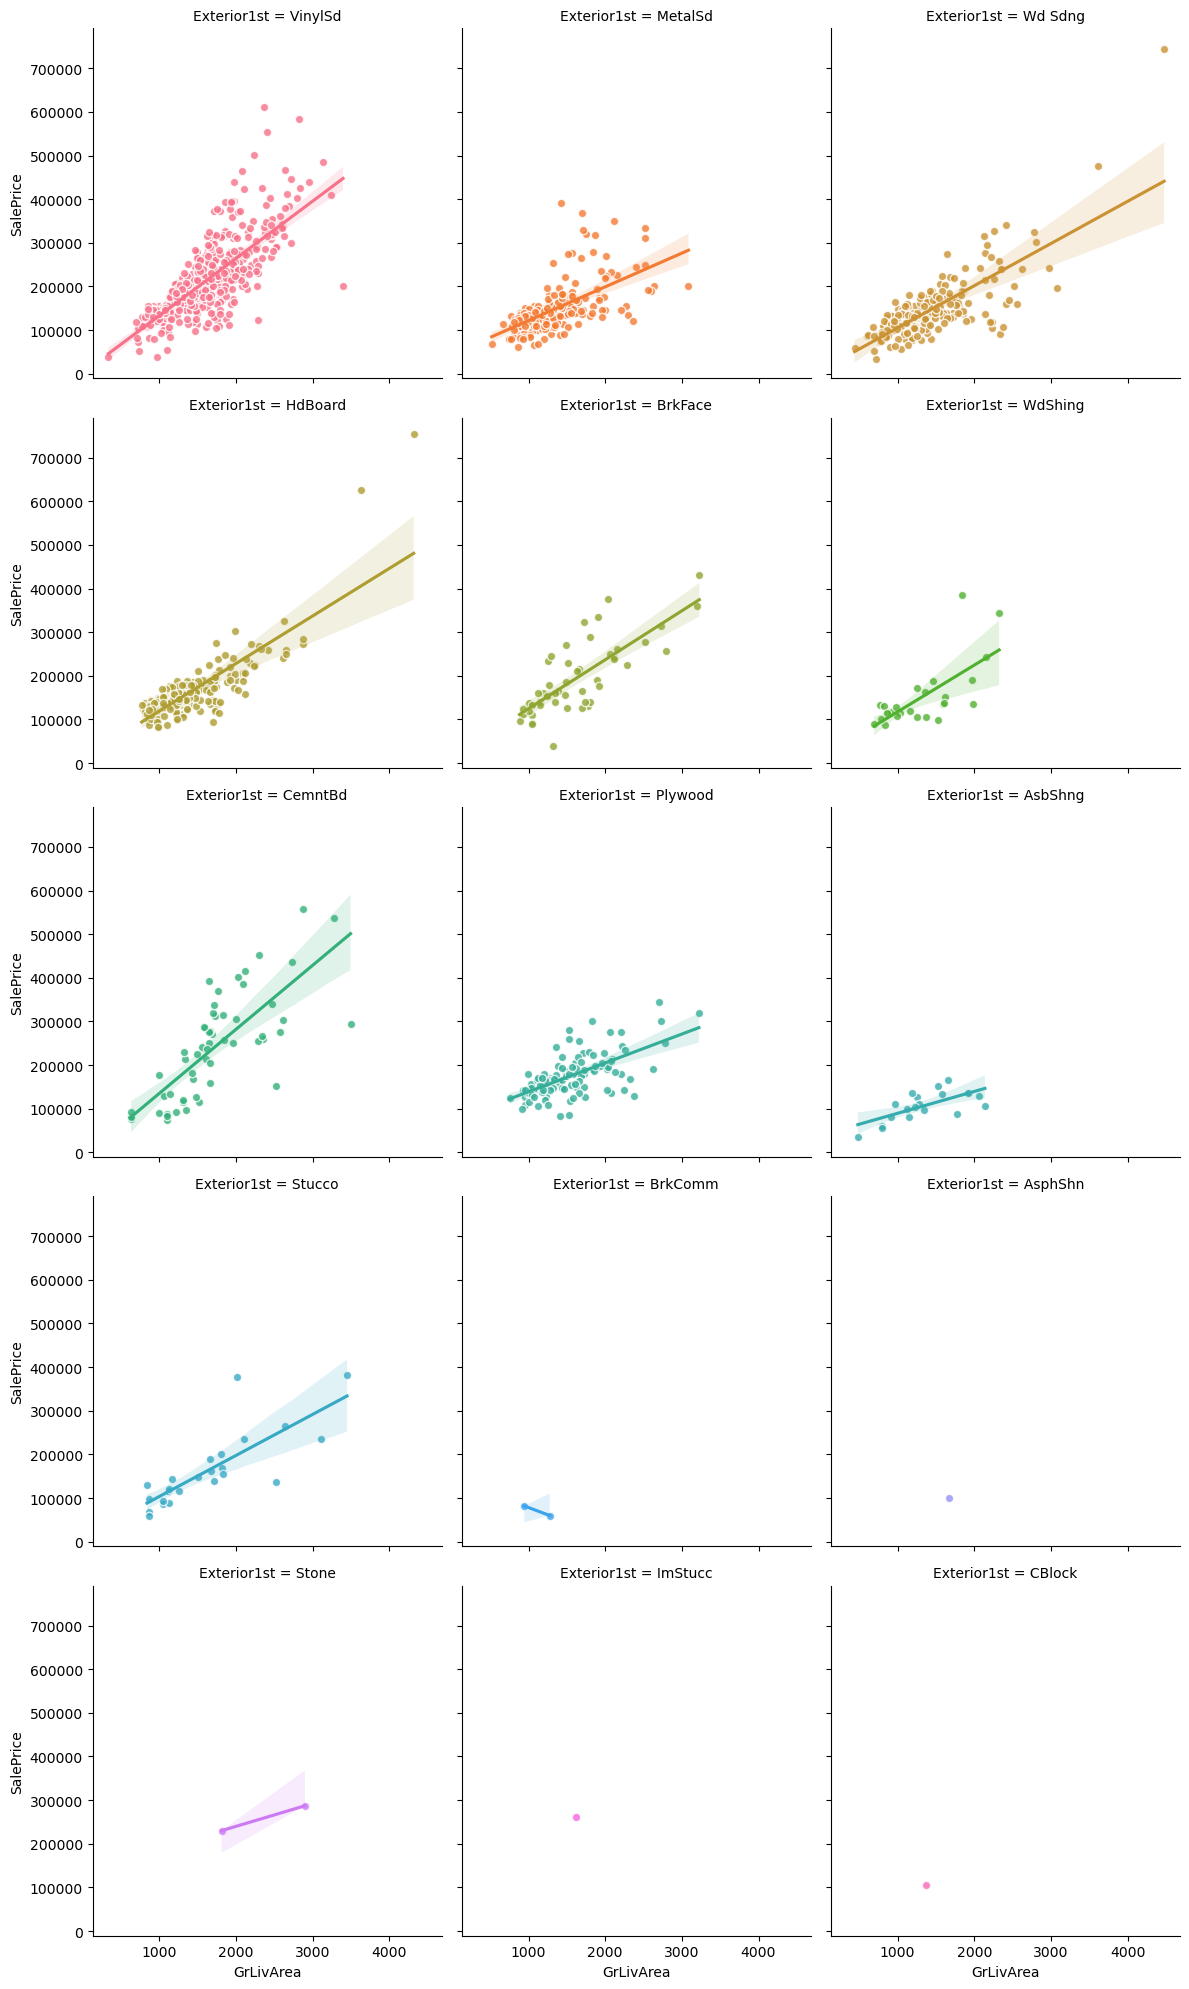

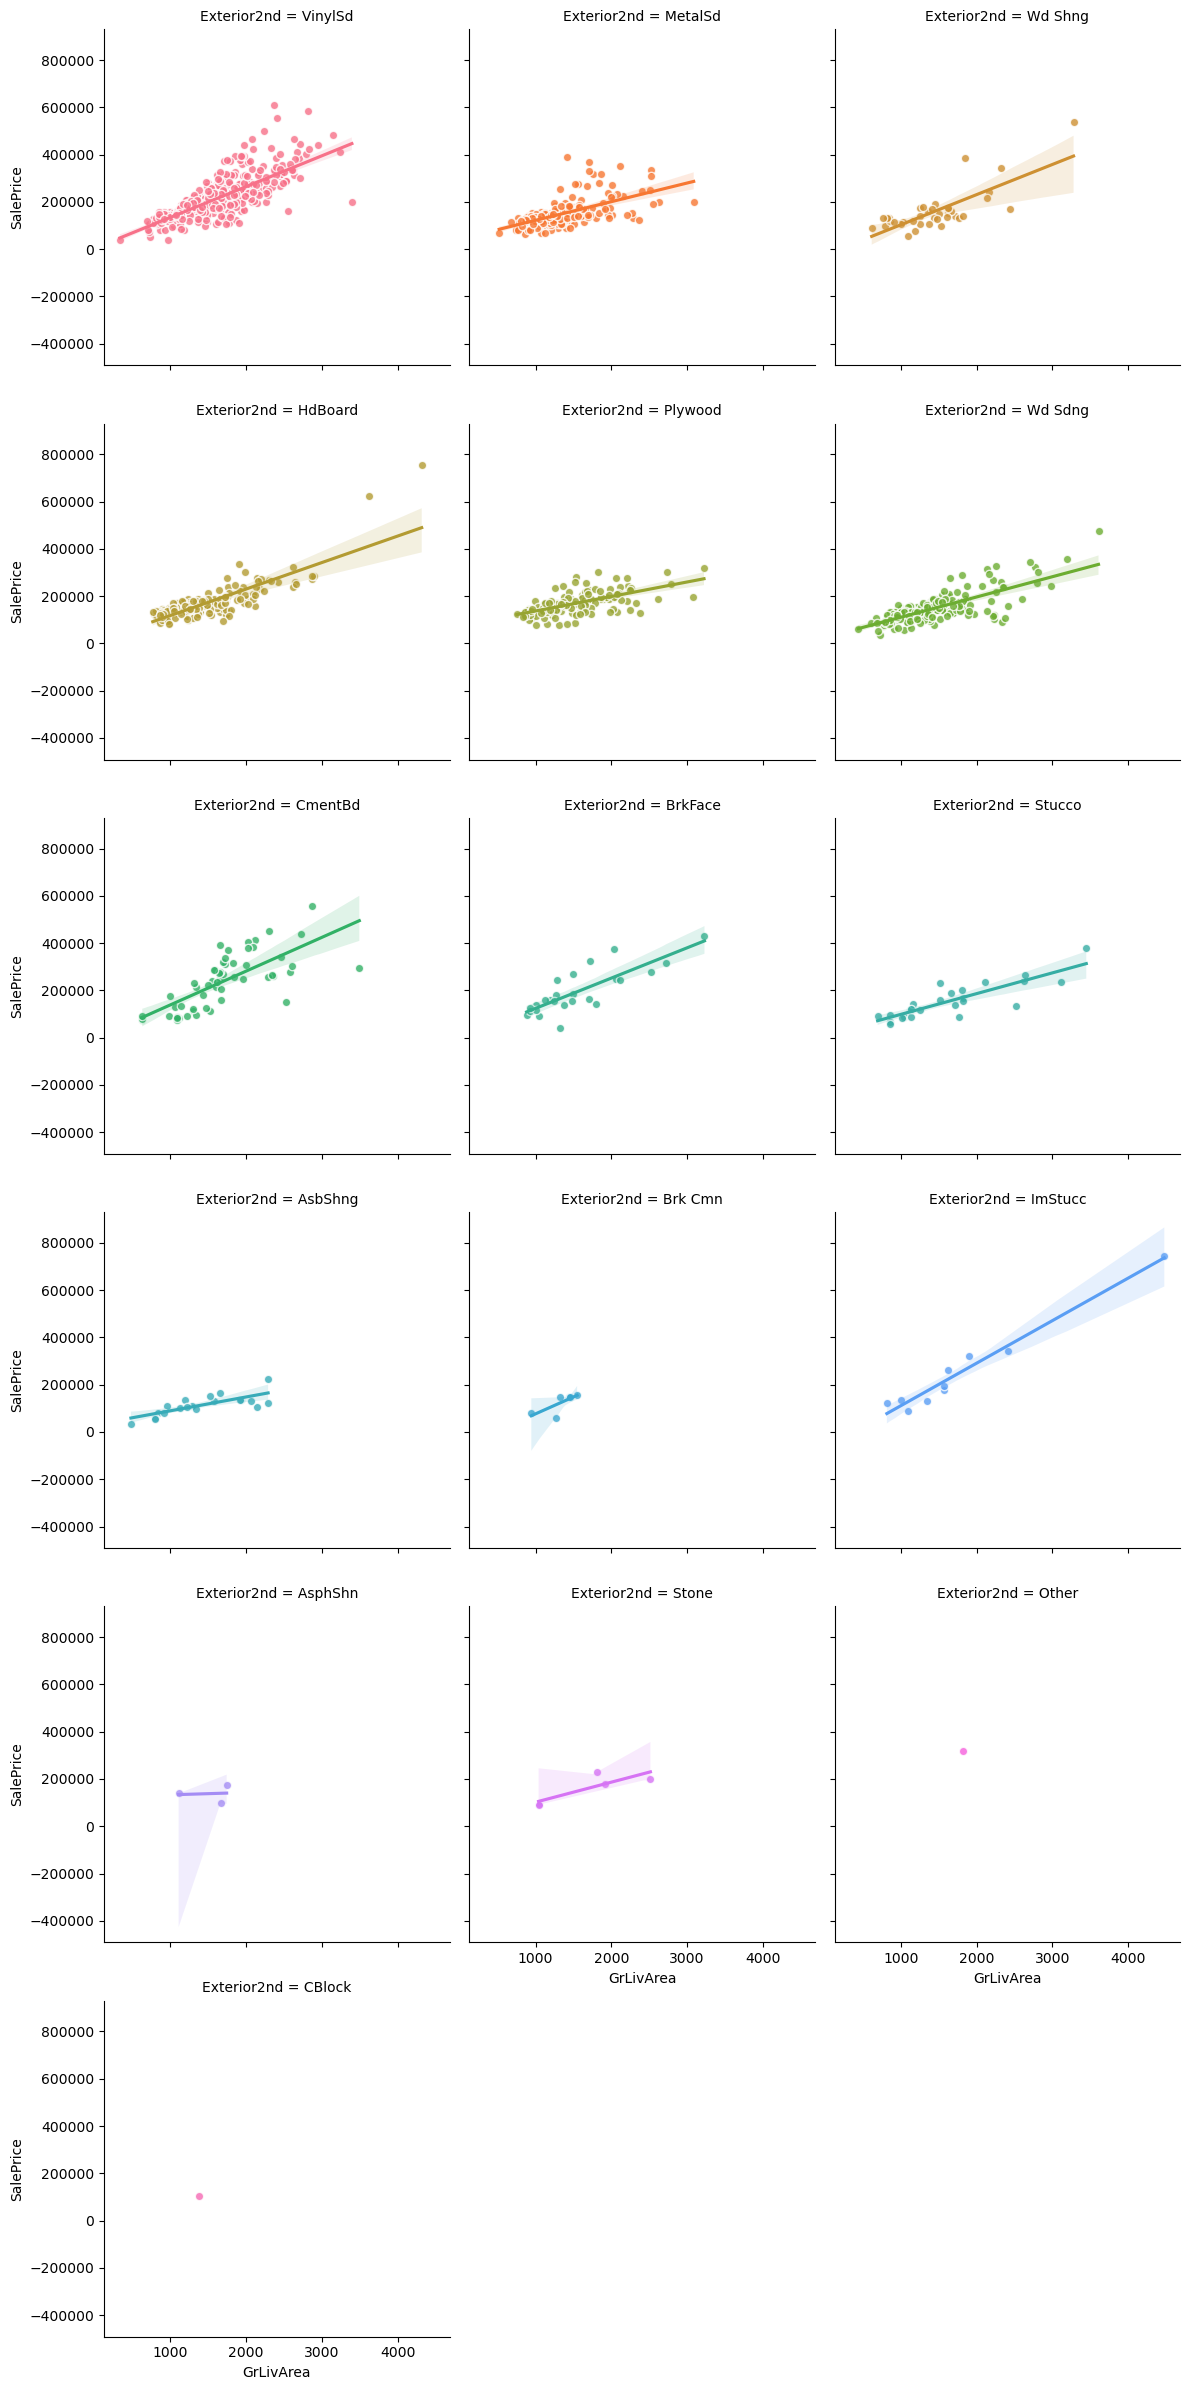

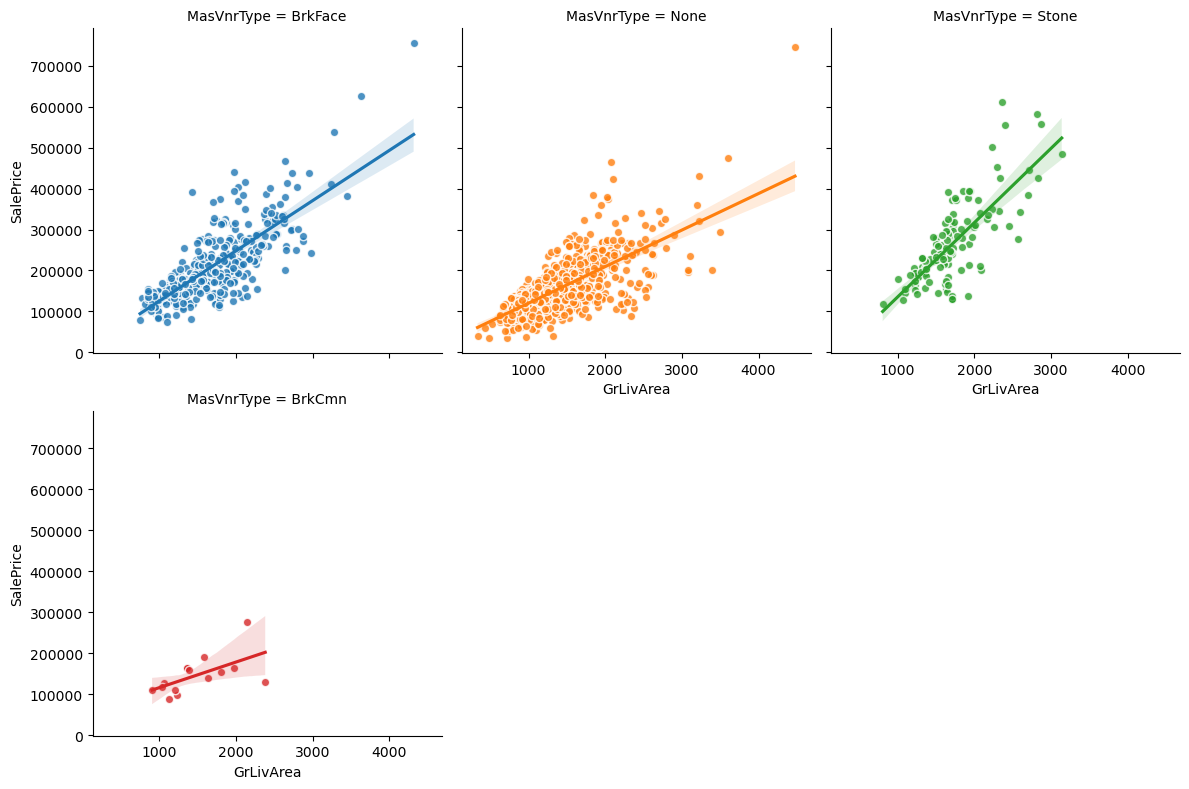

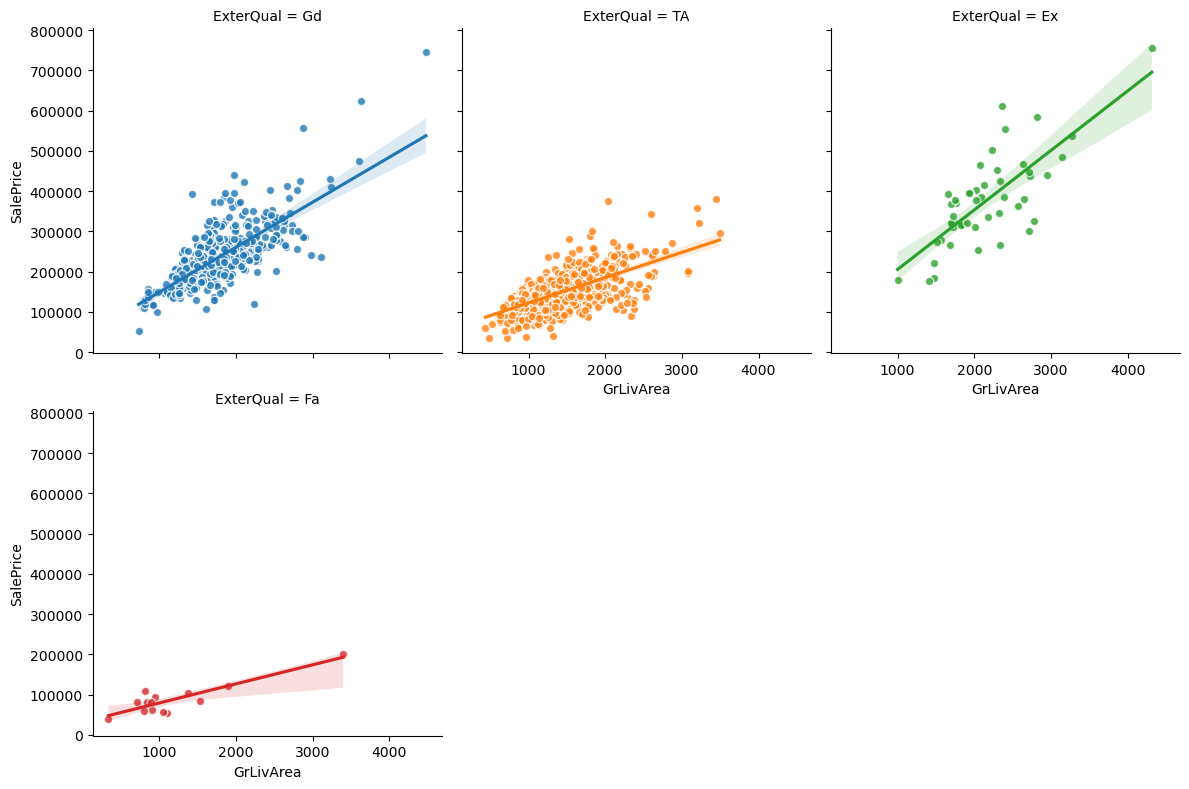

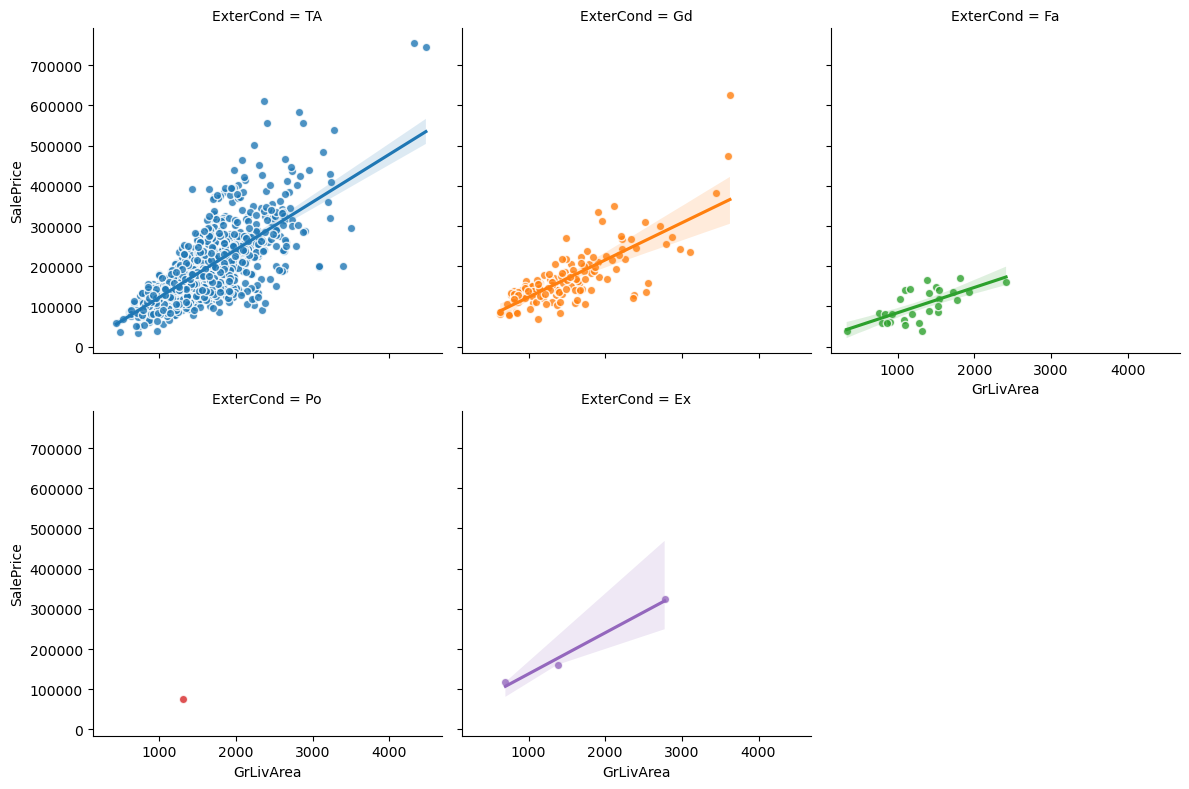

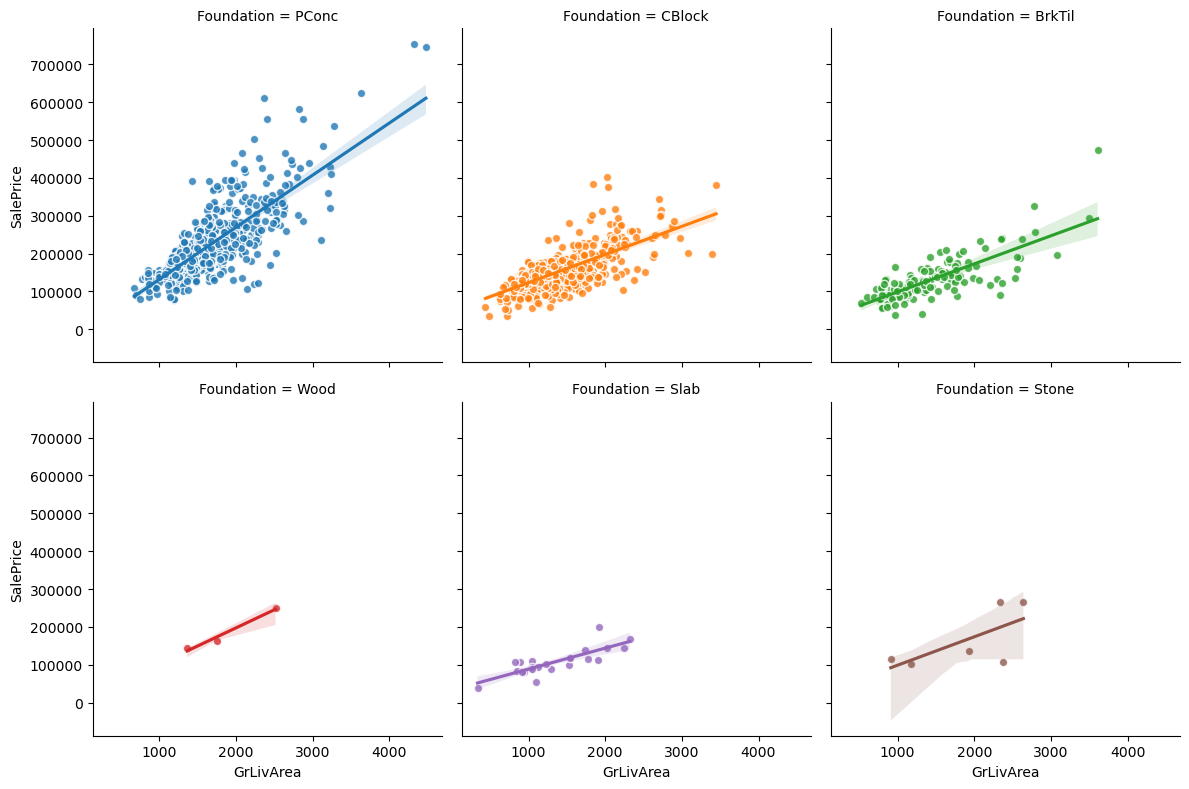

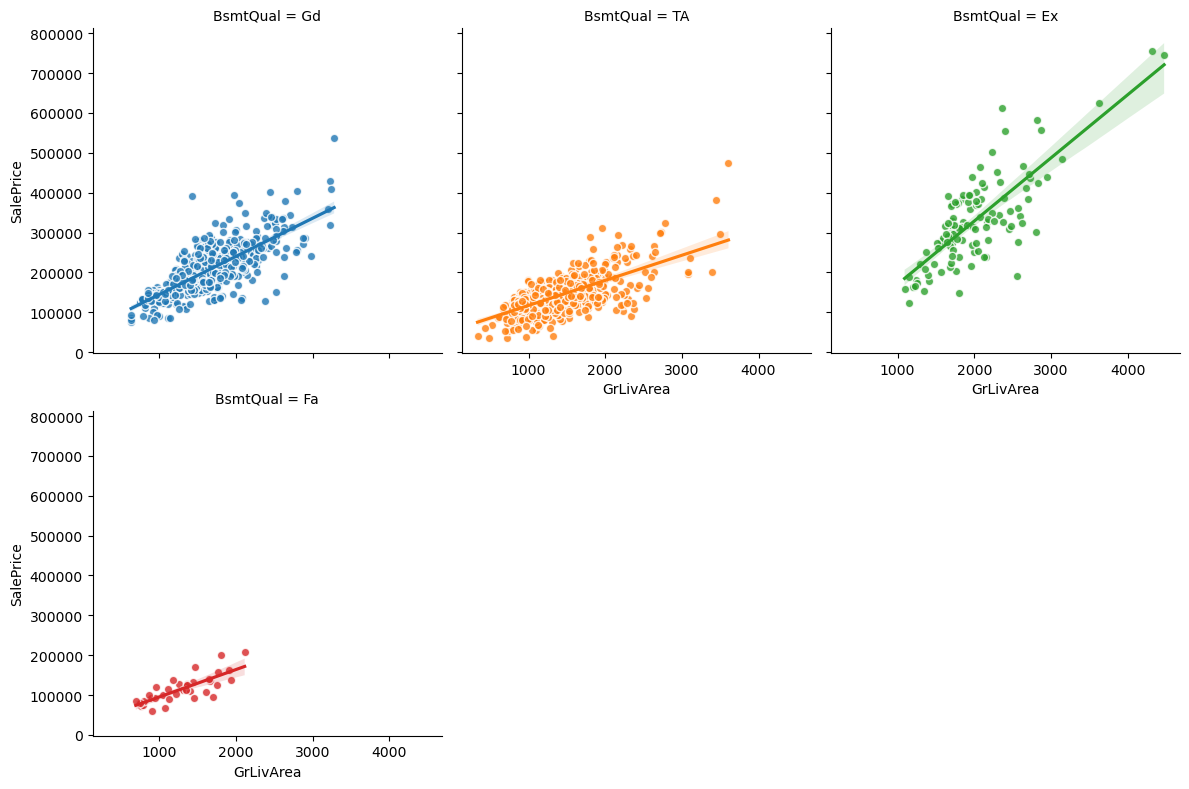

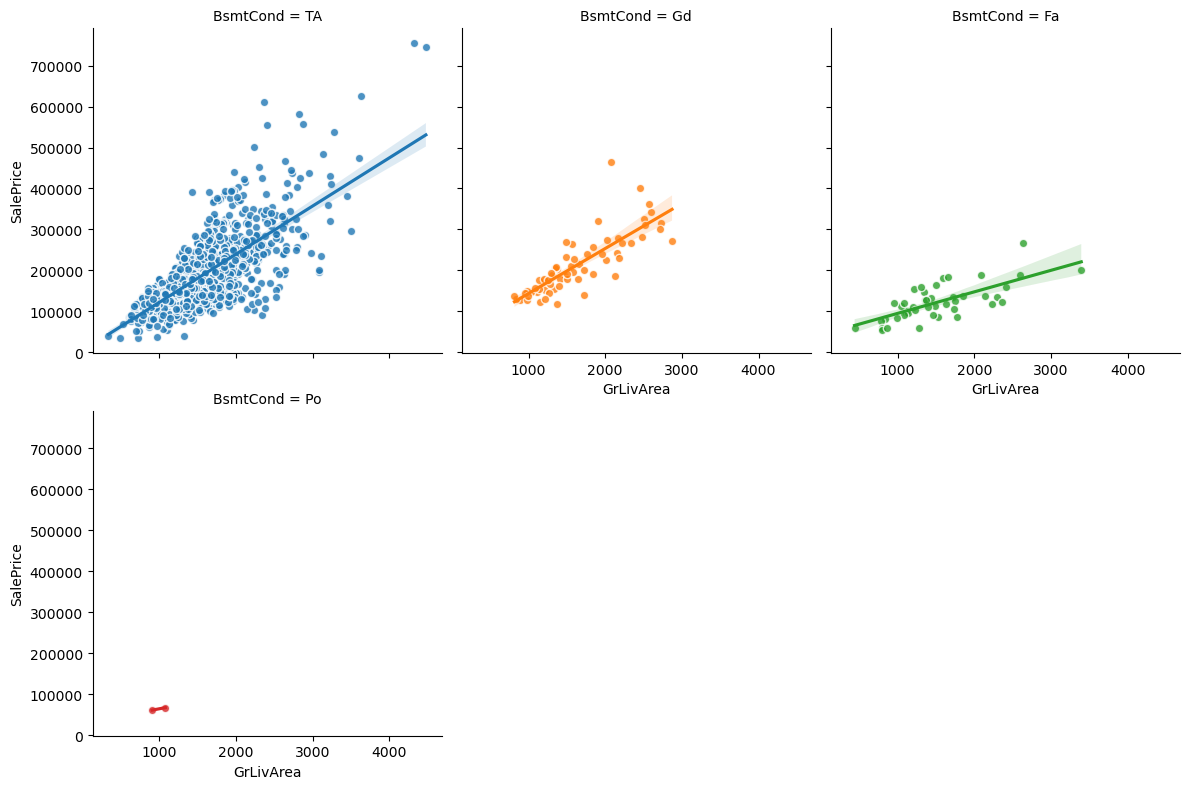

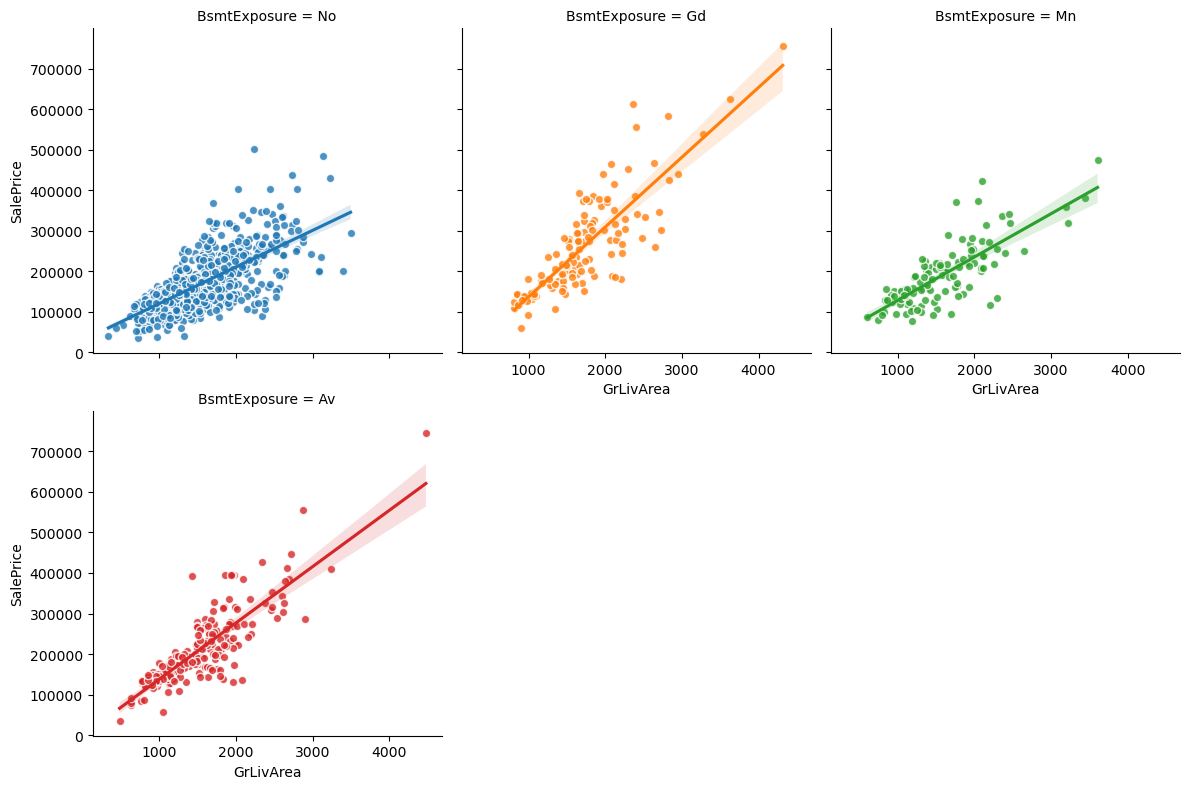

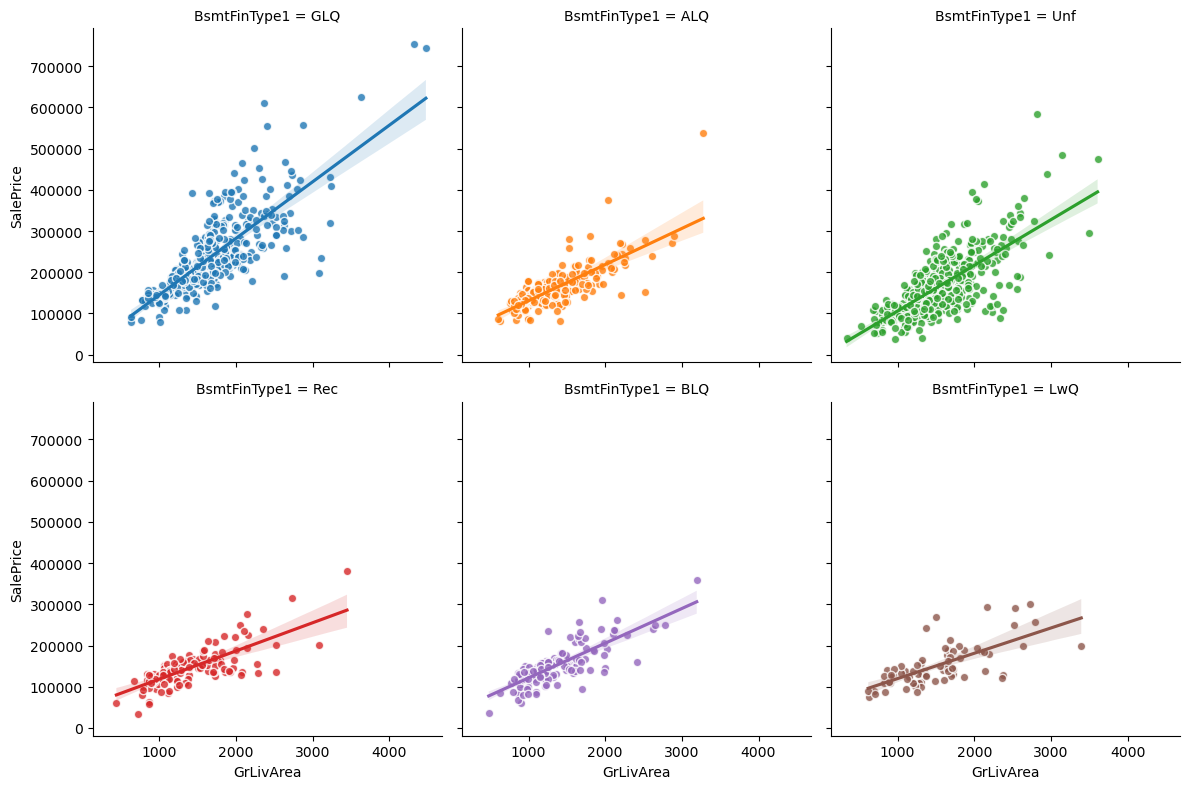

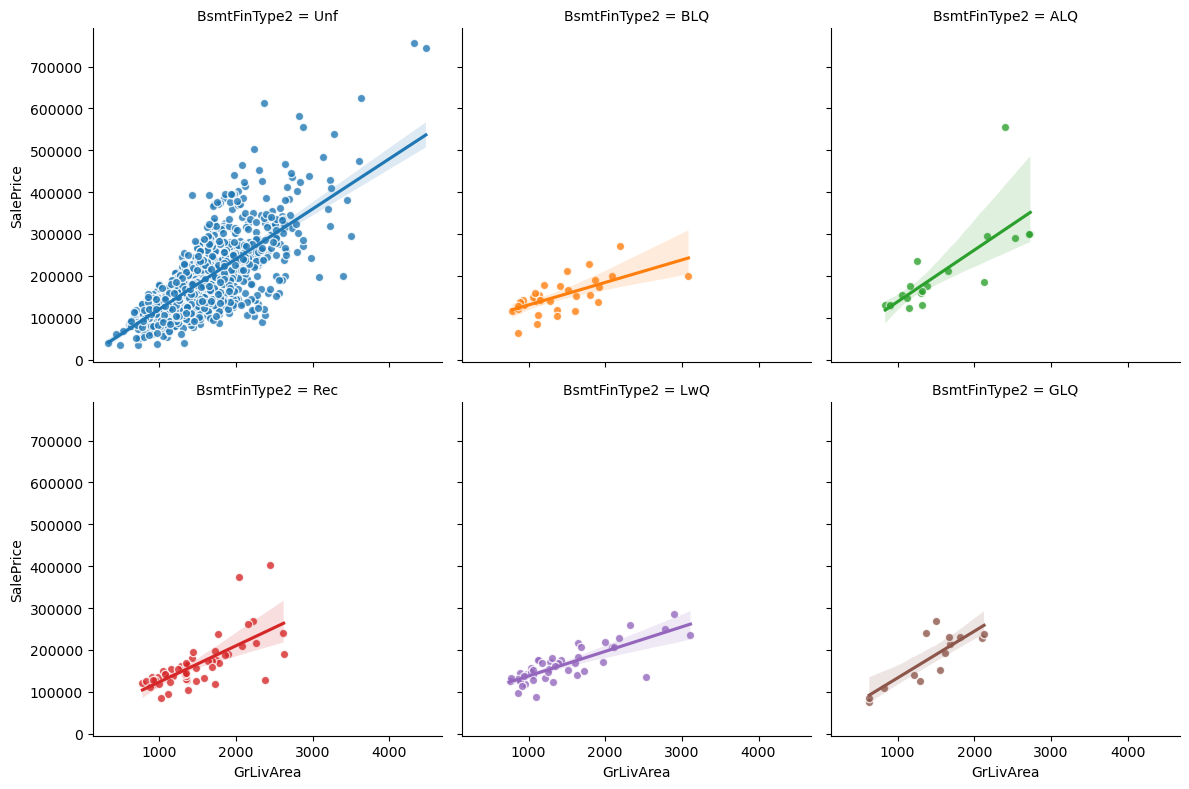

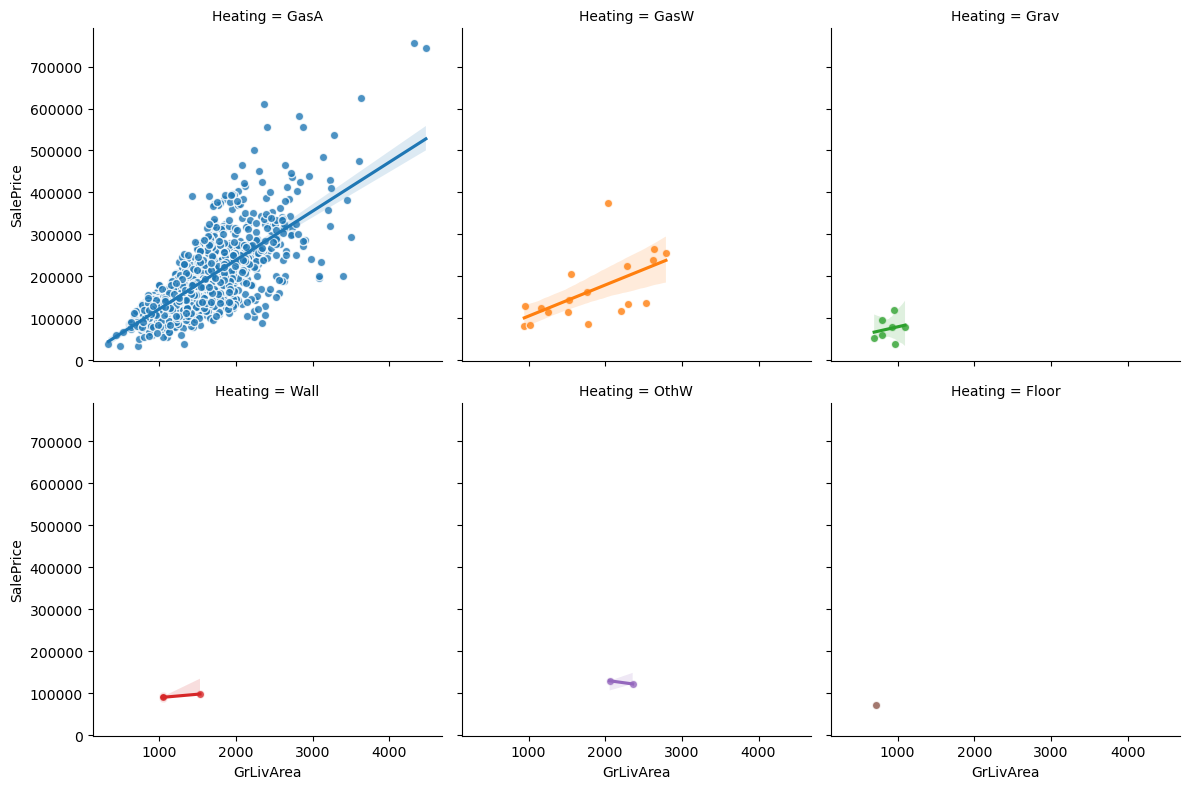

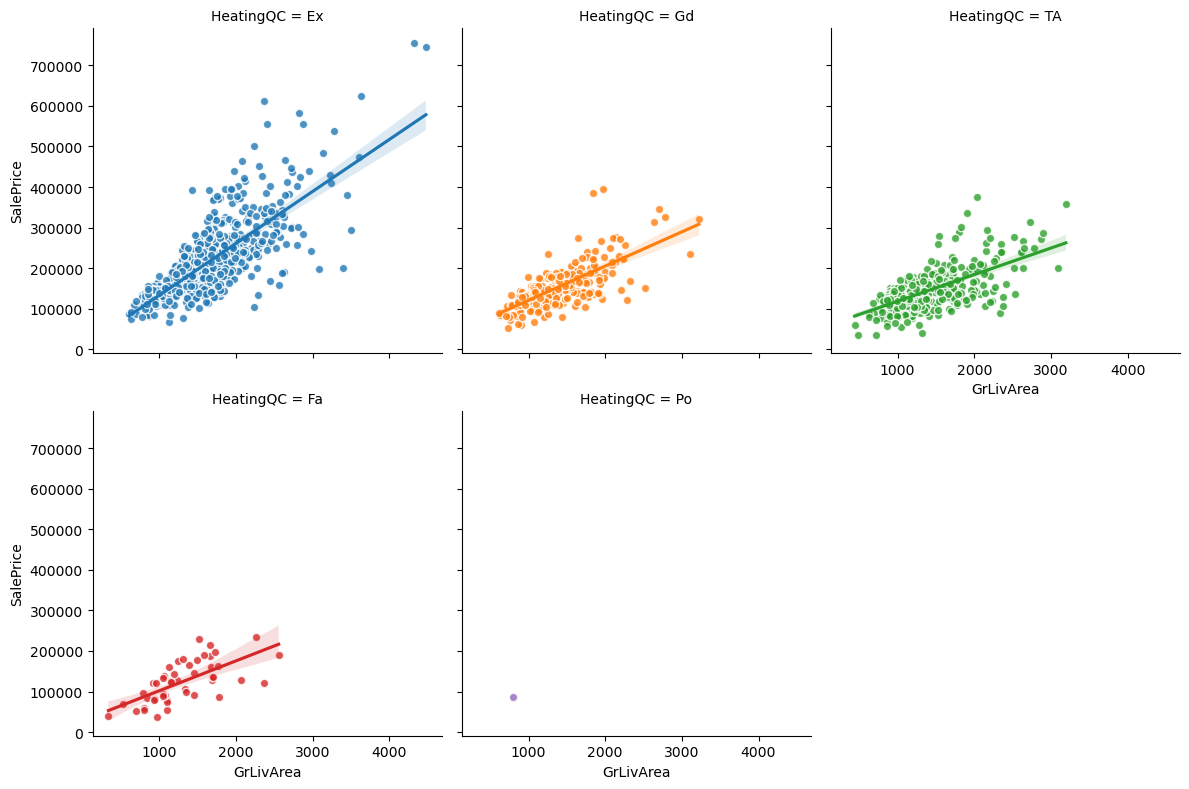

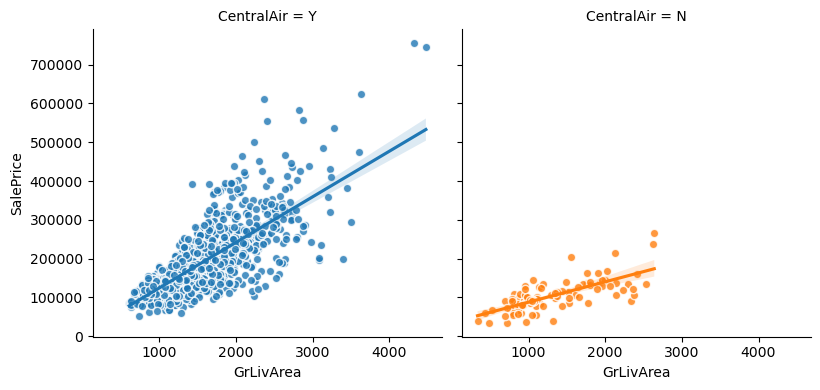

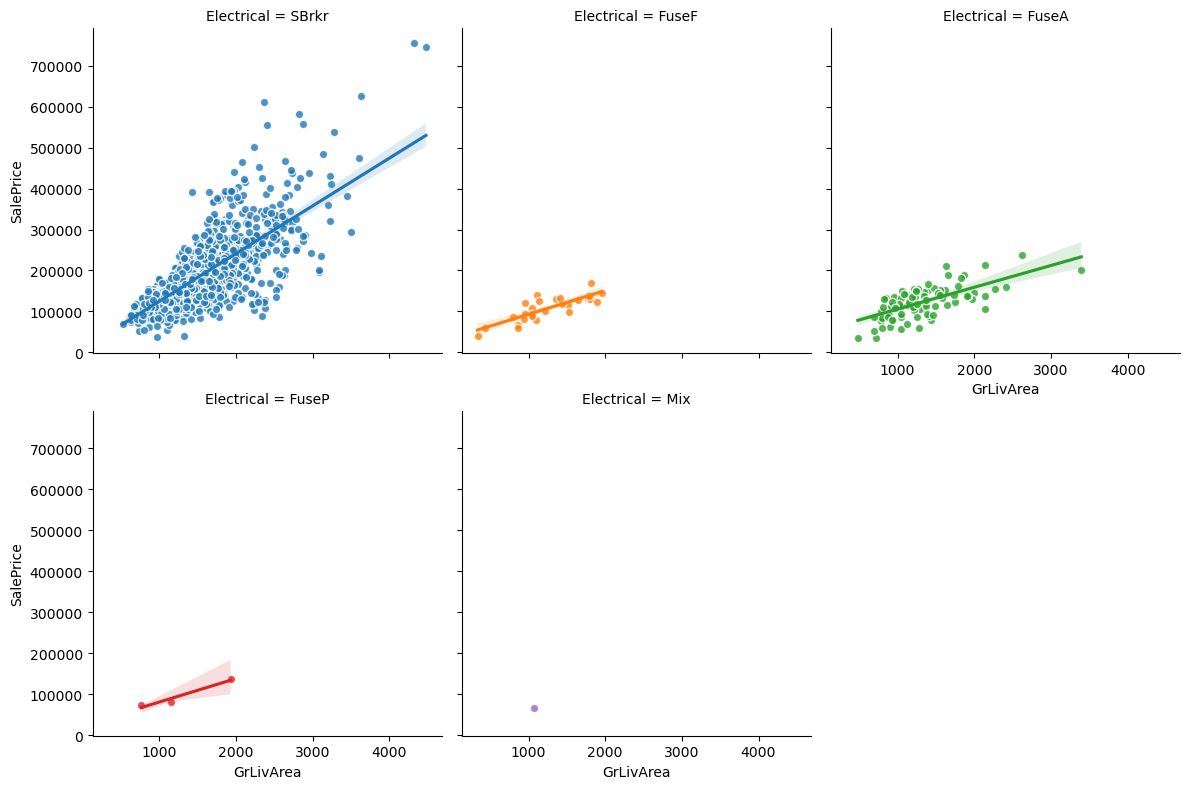

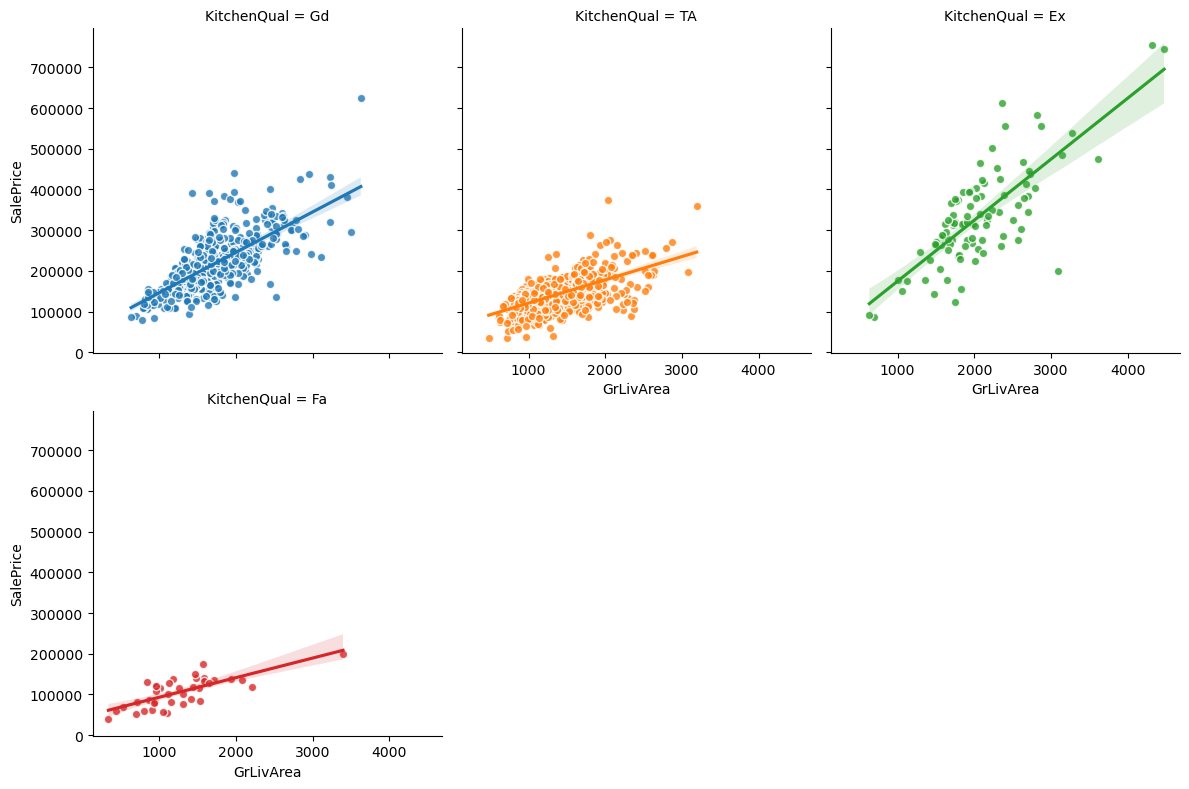

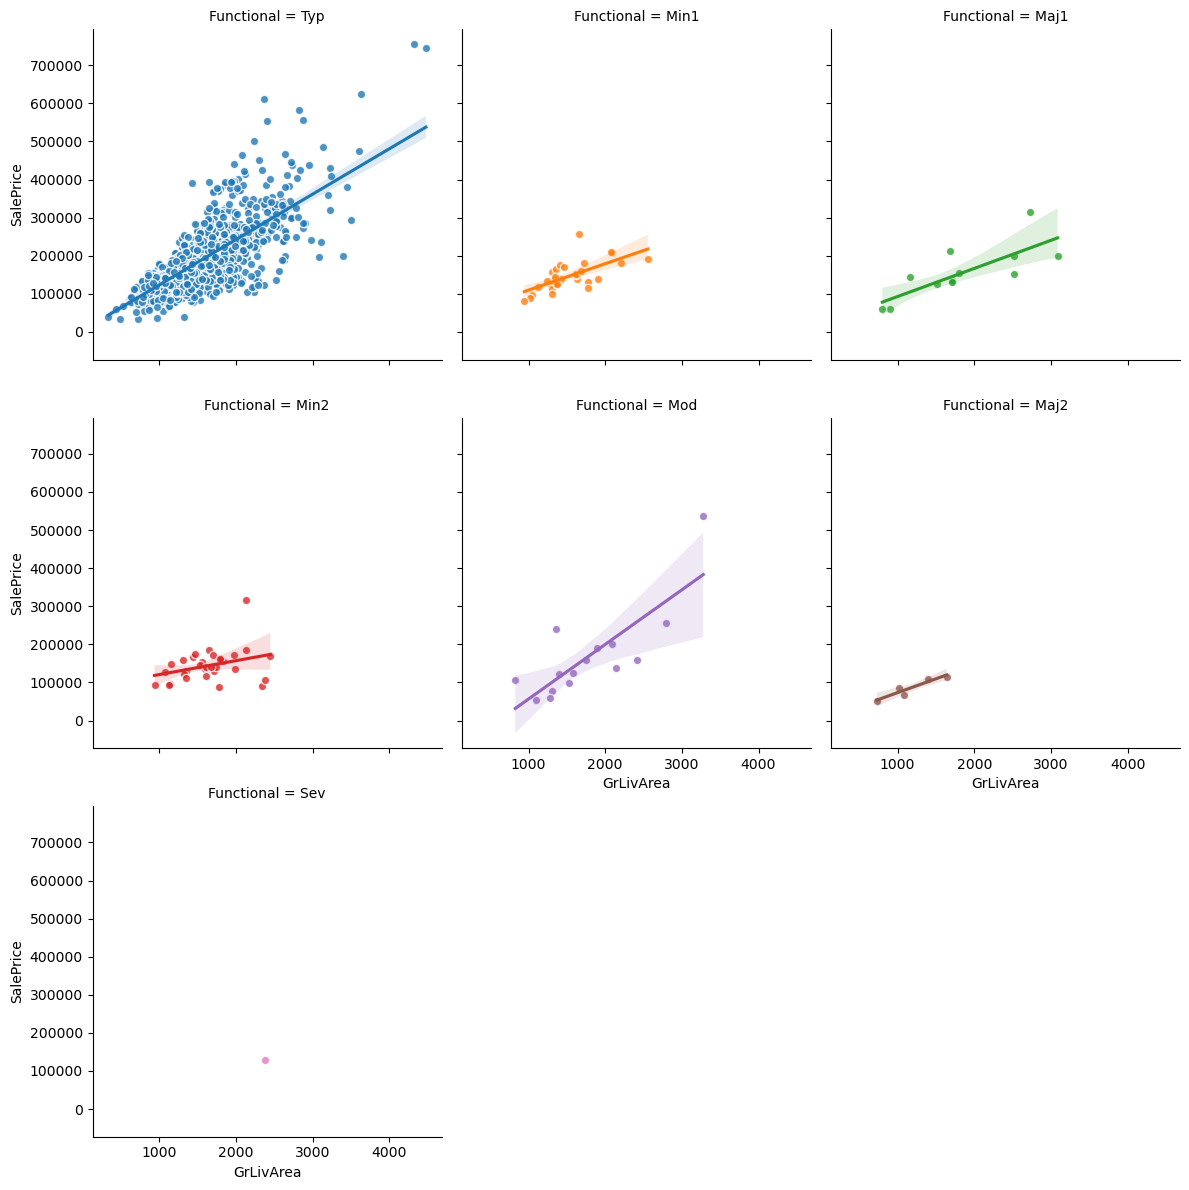

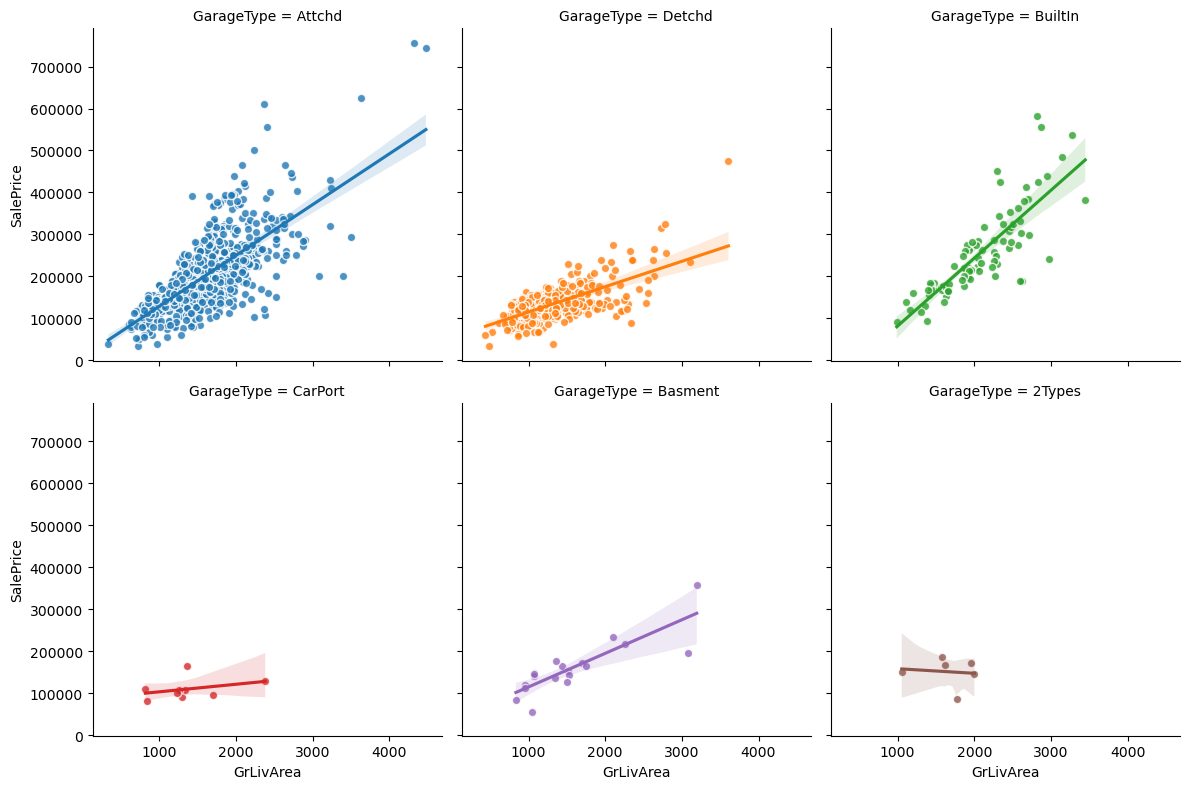

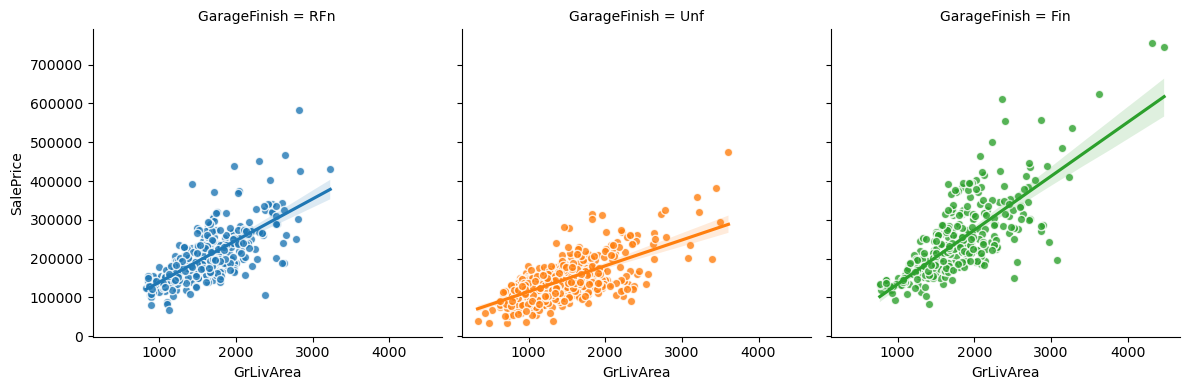

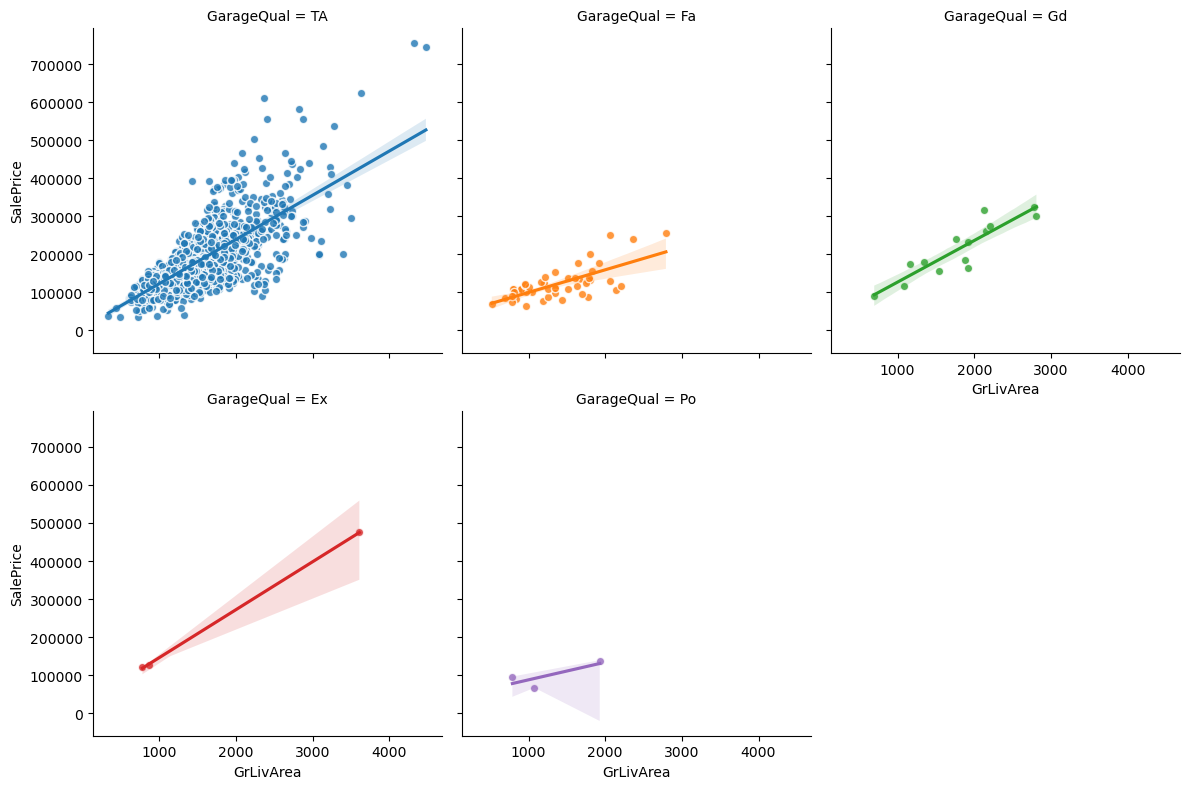

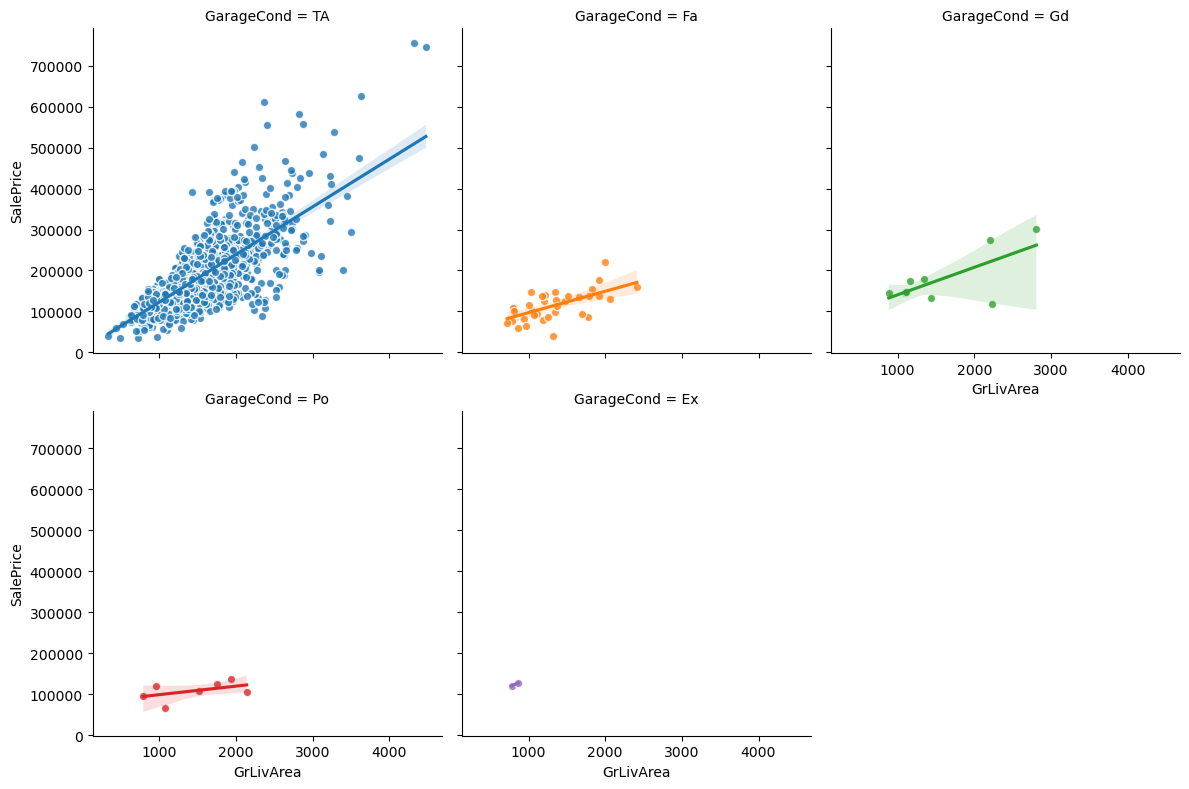

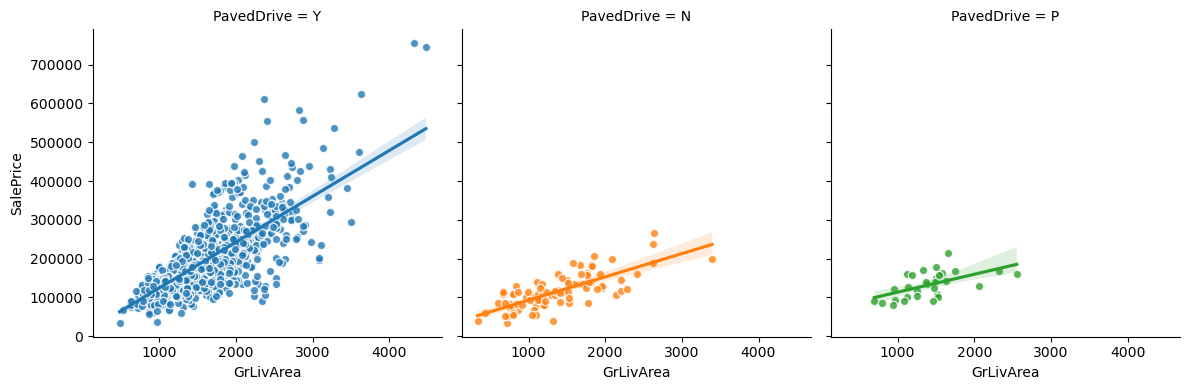

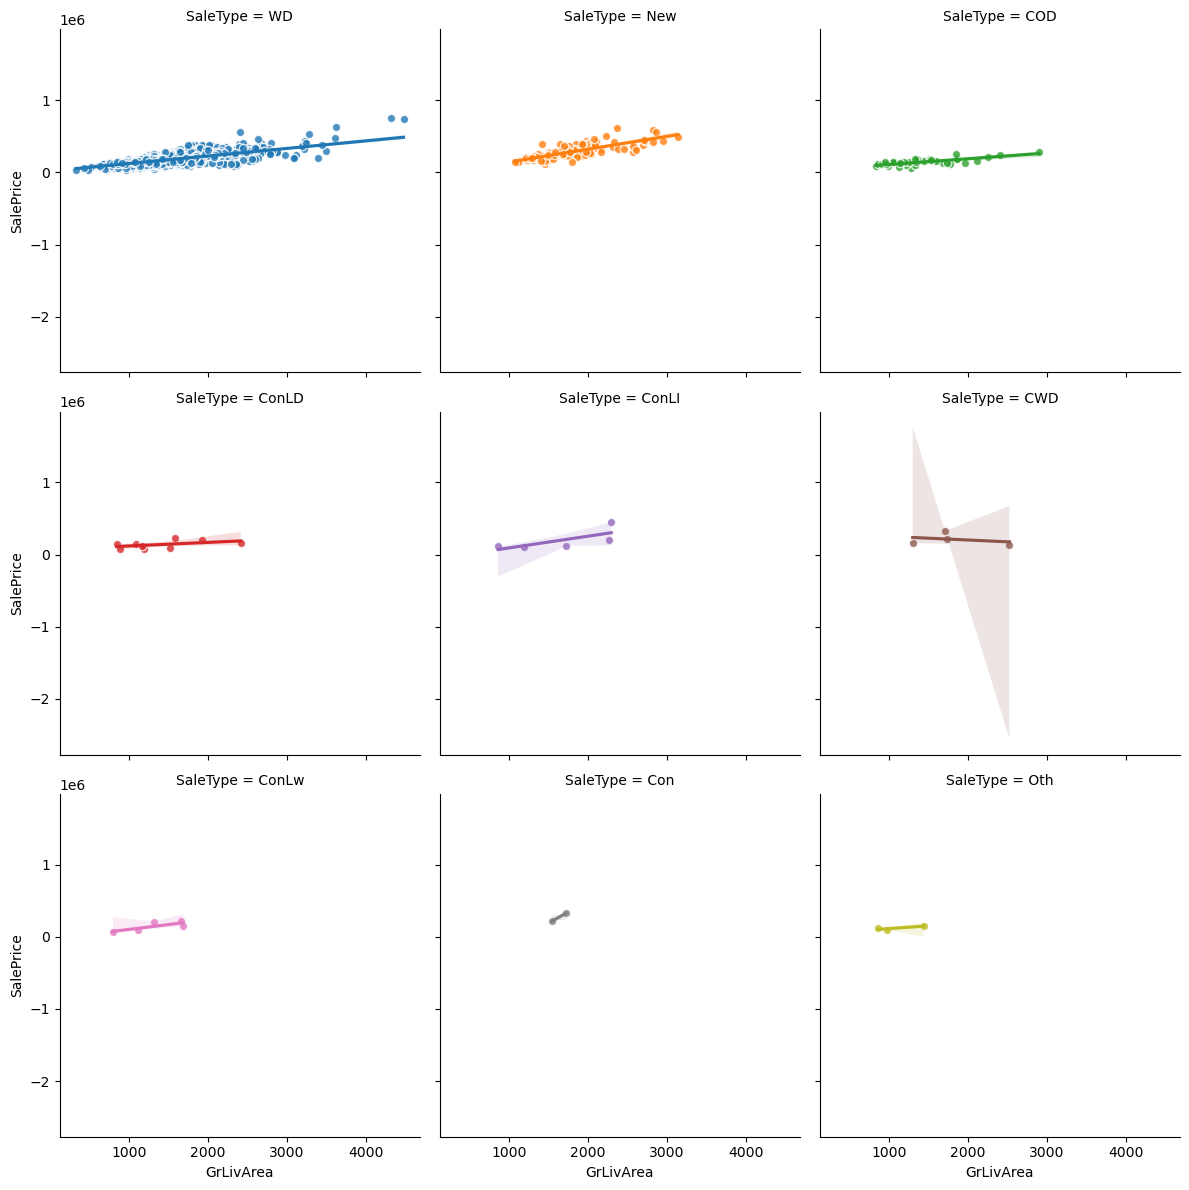

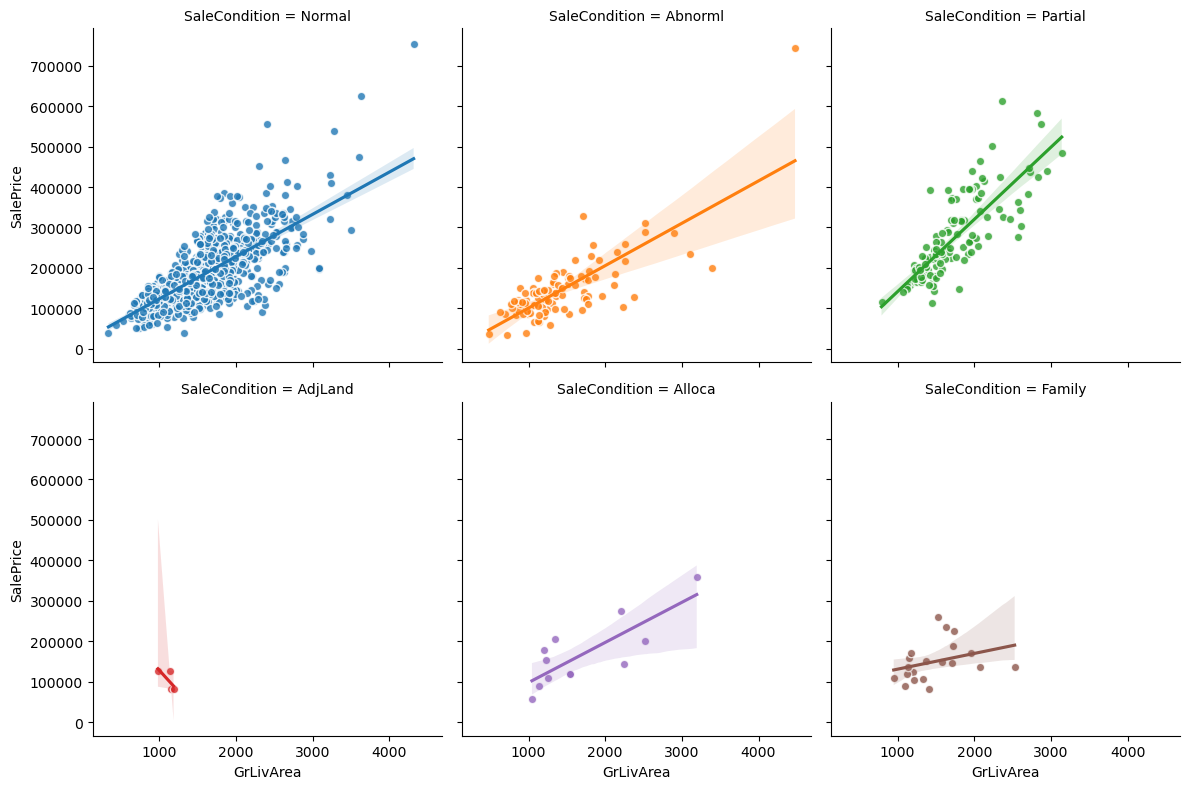

In [173]:
for feature in cat_cols:
    sns.lmplot(
        x='GrLivArea', y="SalePrice", hue= feature, col=feature,
        data=house,col_wrap=3, height=4, scatter_kws={"edgecolor": 'w'}
    );

In [174]:
# I droped the cat columns which have no effect on the distribution of ground area (because of interaction between them) and Sale price
house = house.drop(['Street', 'LotShape','LandContour', 'Utilities', 'LotConfig', 'LandSlope','Condition2', 'RoofMatl', 'SaleType'], axis = 1)

In [175]:
cat_cols = [col for col in house.columns if house[col].dtype not in ['int64', 'float64']]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


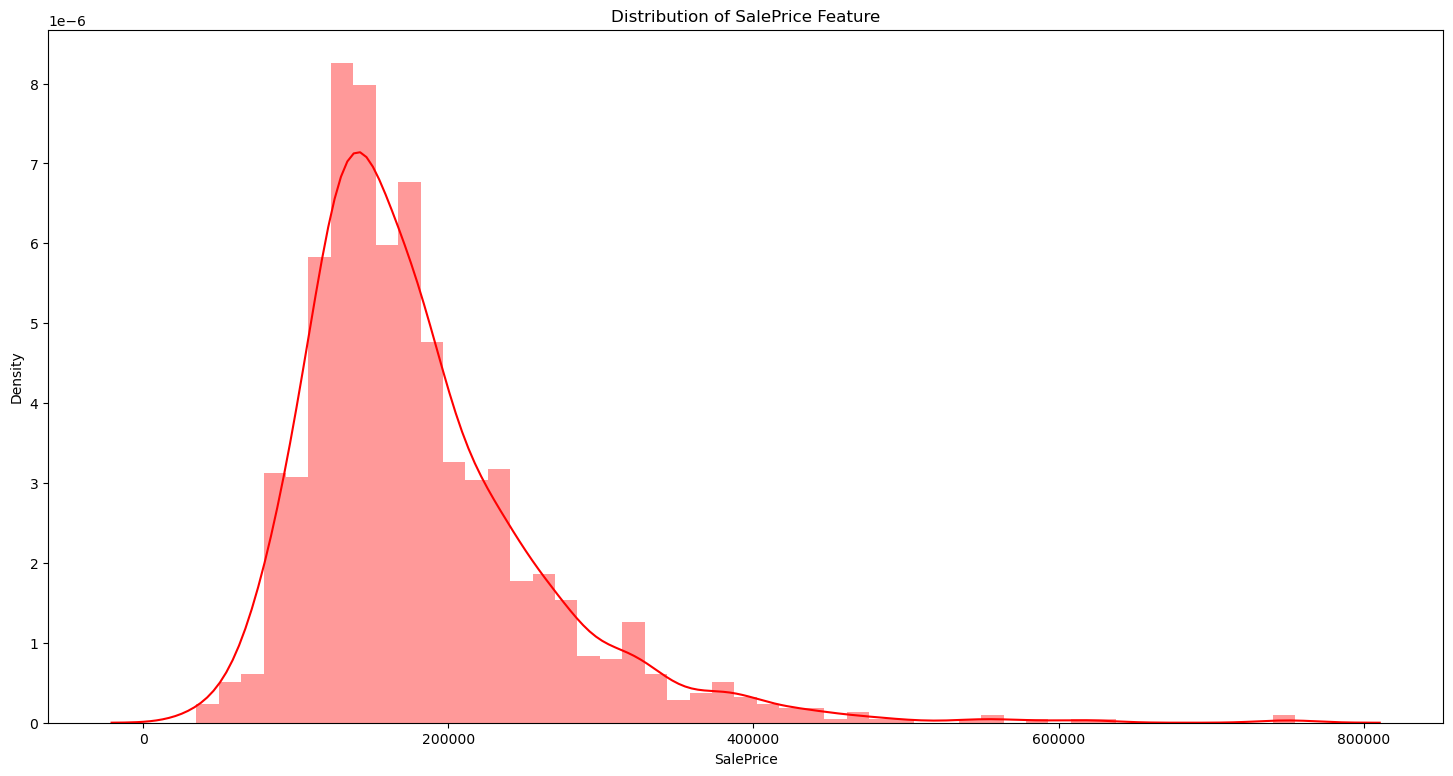

In [176]:
f, ax = plt.subplots(figsize=(18,9))
sns.distplot(house['SalePrice'], color="red")
ax.set(xlabel="SalePrice")
ax.set(title="Distribution of SalePrice Feature")
plt.show()

The distribution of the SalePrice feature seems not like Normal Distribution. To convert the distribution of the SalePrice Feature to Normal Distribution, np.log1p transformation function in numpy was applied

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  after removing the cwd from sys.path.


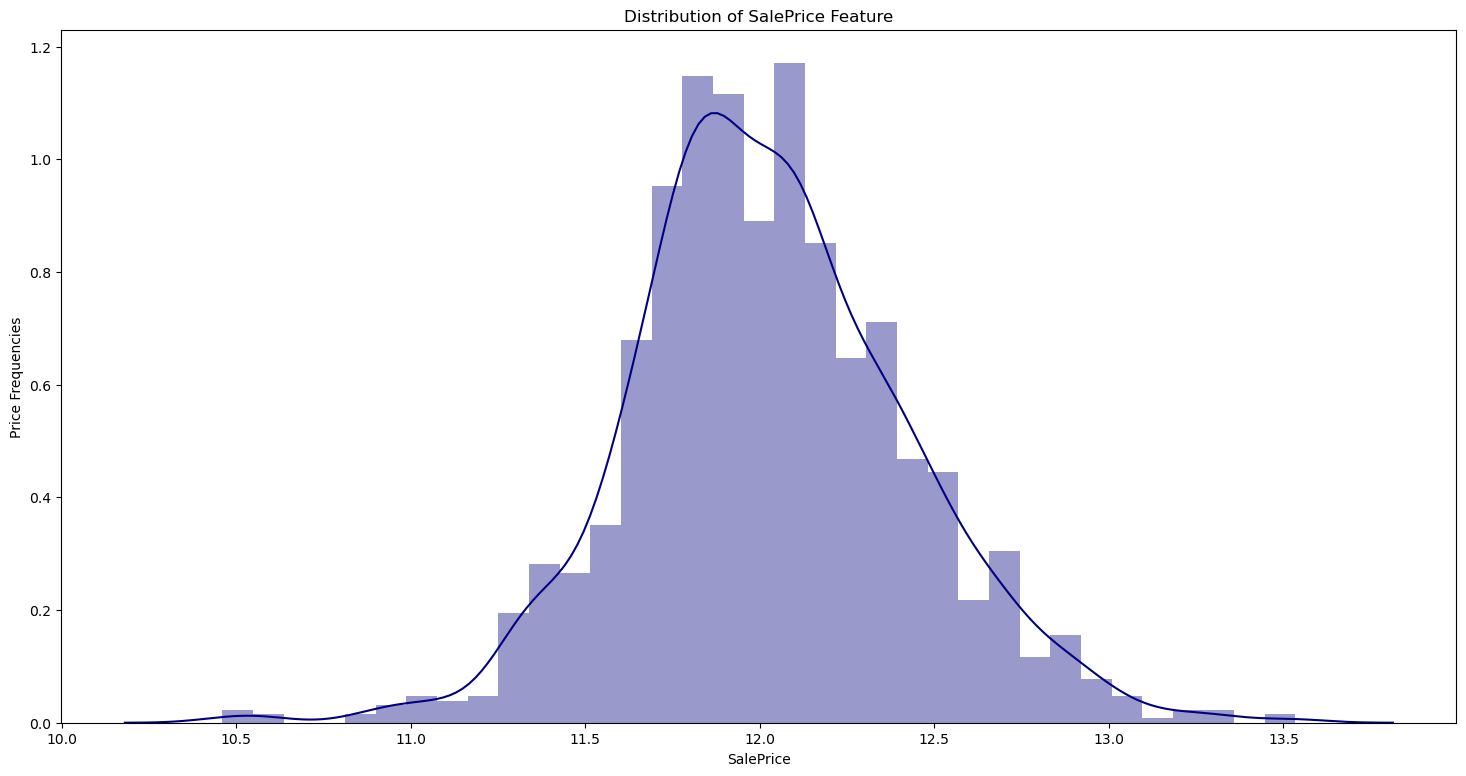

In [177]:
house['SalePrice'] = np.log1p(house['SalePrice'])

f, ax = plt.subplots(figsize=(18,9))
sns.distplot(house['SalePrice'], color="navy")
ax.set(ylabel="Price Frequencies")
ax.set(xlabel="SalePrice")
ax.set(title="Distribution of SalePrice Feature")
plt.show()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


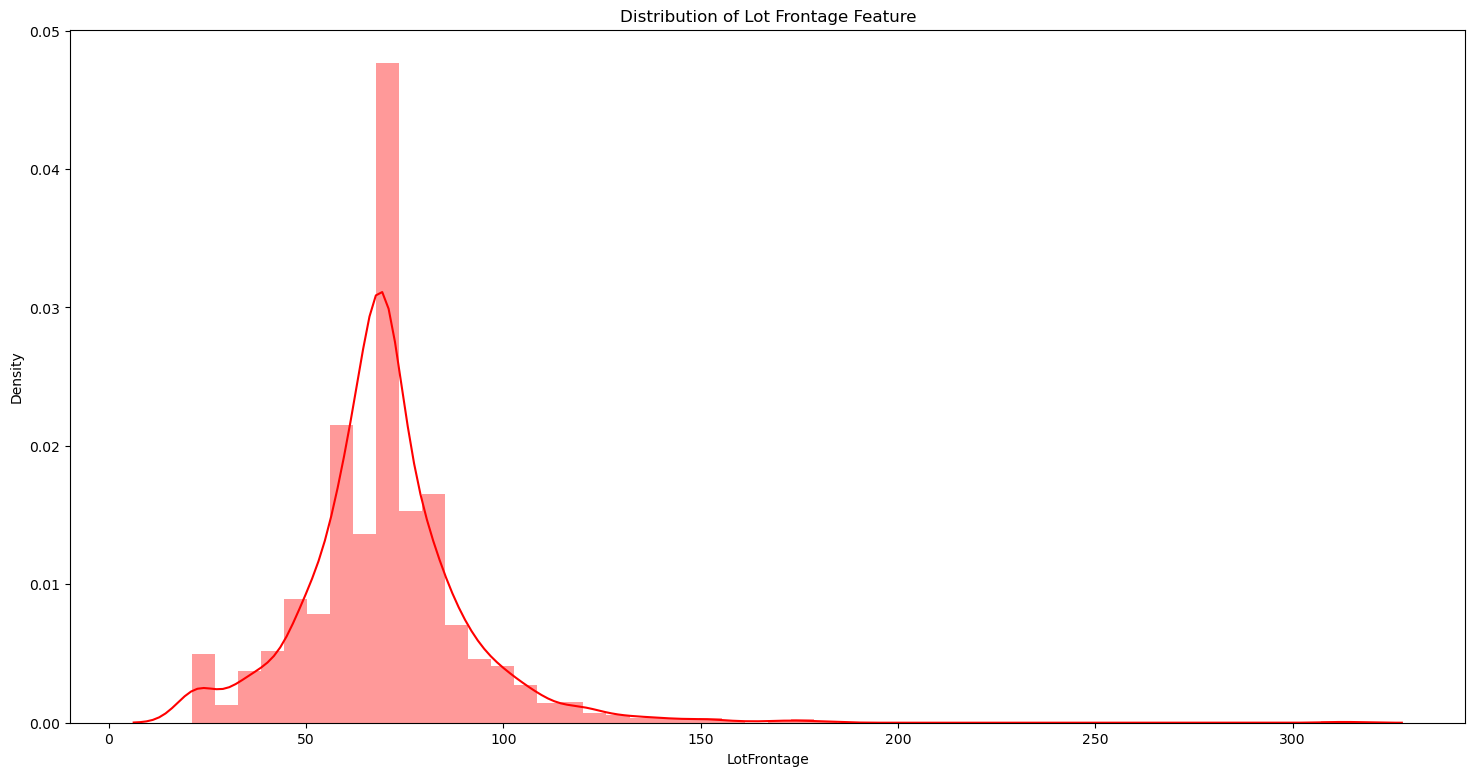

In [178]:
f, ax = plt.subplots(figsize=(18,9))
sns.distplot(house['LotFrontage'], color="red")
ax.set(xlabel="LotFrontage")
ax.set(title="Distribution of Lot Frontage Feature")
plt.show()

The distribution of the LotFrontage feature seems not like Normal Distribution.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


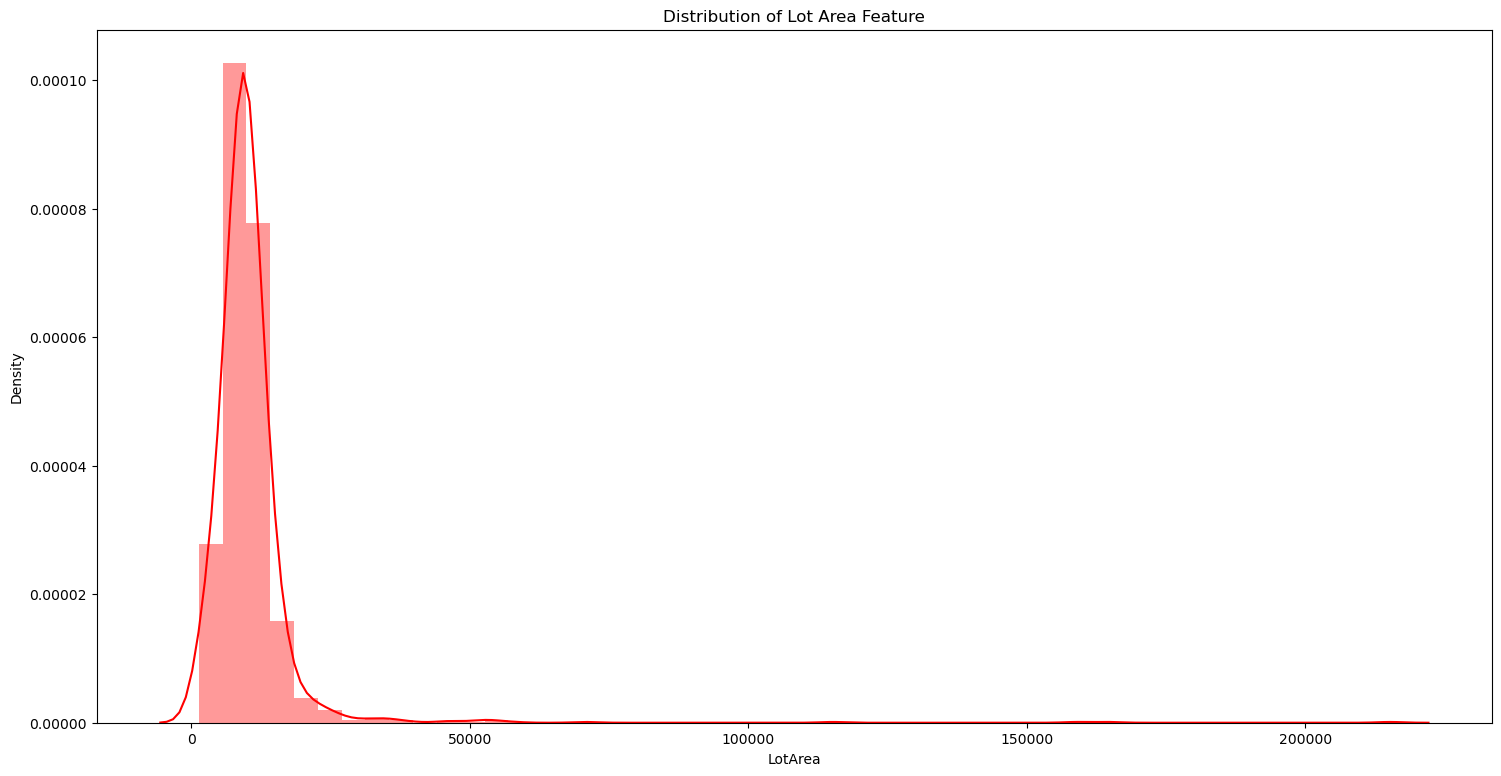

In [179]:
f, ax = plt.subplots(figsize=(18,9))
sns.distplot(house['LotArea'], color="red")
ax.set(xlabel="LotArea")
ax.set(title="Distribution of Lot Area Feature")
plt.show()

The distribution of the LotArea feature seems not like Normal Distribution.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


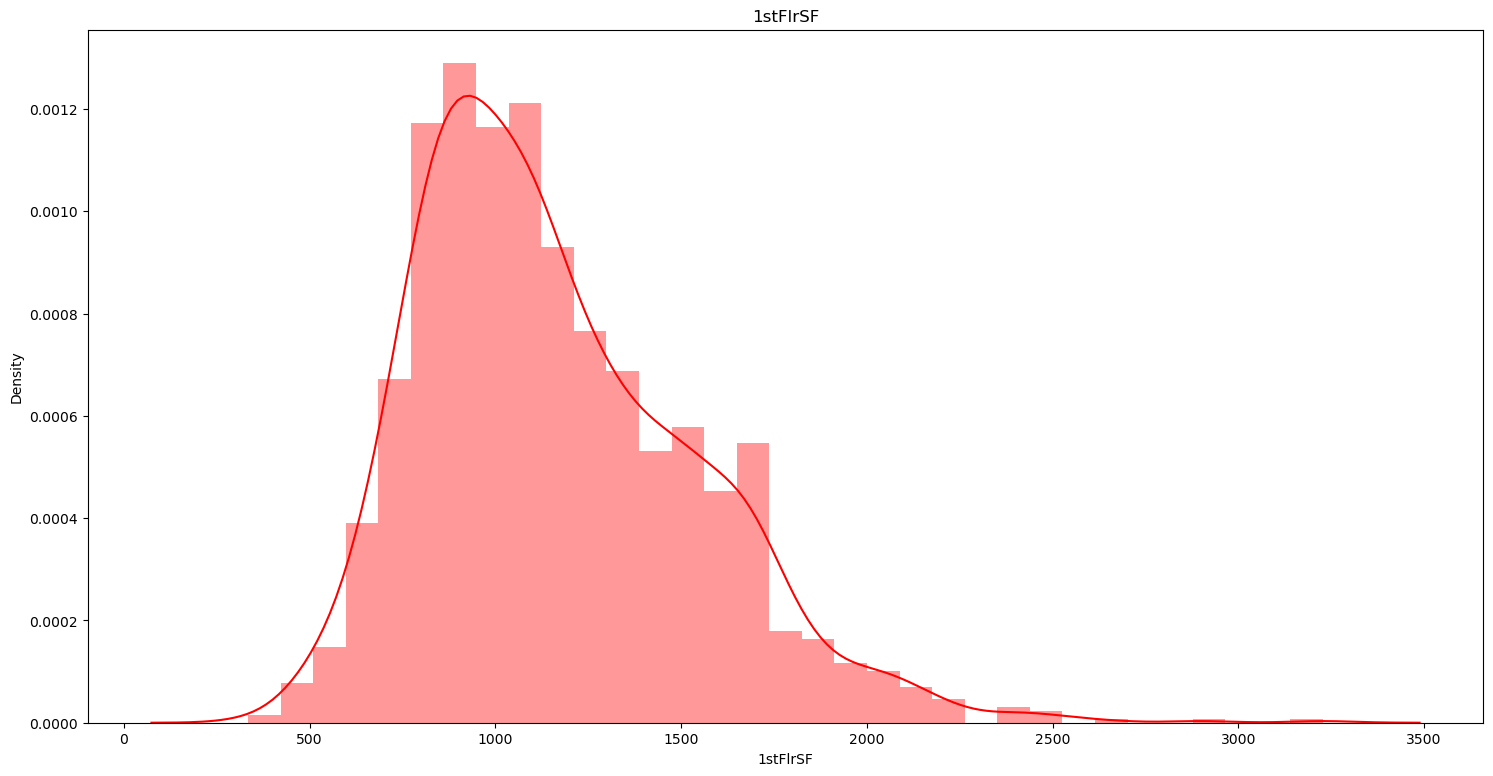

In [180]:
f, ax = plt.subplots(figsize=(18,9))
sns.distplot(house['1stFlrSF'], color="red")
ax.set(xlabel="1stFlrSF")
ax.set(title="1stFlrSF")
plt.show()

The distribution of the 1stFlrSF feature seems not like Normal Distribution. 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


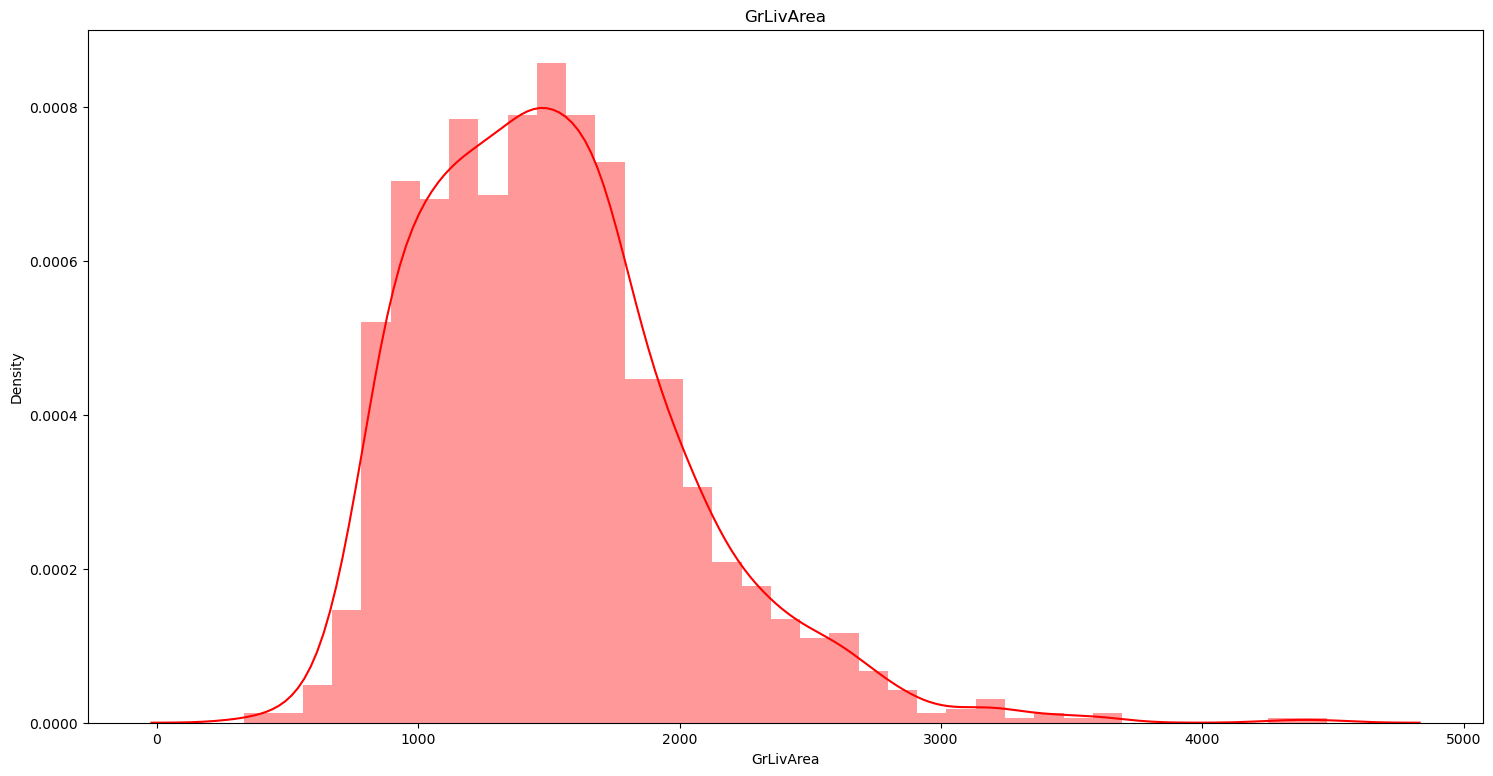

In [181]:
f, ax = plt.subplots(figsize=(18,9))
sns.distplot(house['GrLivArea'], color="red")
ax.set(xlabel="GrLivArea")
ax.set(title="GrLivArea")
plt.show()

The distribution of the GrLivArea feature seems not like Normal Distribution.

# Feature Selection

In [182]:
x_num_features = house[num_cols].corrwith(house['SalePrice']).sort_values(ascending = False).head(9).index
x_num_features = x_num_features.drop('SalePrice')
x_num_features = x_num_features.to_list()

In [183]:
house_x = house[x_num_features + cat_cols]

# Feature Engineering 

In [184]:
house_x['GrLivArea'] = np.log1p(house_x['GrLivArea'])
house_x['GarageArea'] = np.log1p(house_x['GarageArea'])
house_x['TotalBsmtSF'] = np.log1p(house_x['TotalBsmtSF'])
house_x['1stFlrSF'] = np.log1p(house_x['1stFlrSF'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

# Training REGRESSION MODELS

In [185]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
import lightgbm as lgb
from lightgbm import LGBMRegressor
rfr = RandomForestRegressor(random_state=0)
lgbm = LGBMRegressor(objective='regression', random_state=0)

In [195]:
house_x = pd.get_dummies(house_x, drop_first=True)
y = house.SalePrice
train_x, val_x, train_y, val_y = train_test_split(house_x, y, random_state = 5)

In [196]:
lgbm_mse_cv_scores = - cross_val_score(lgbm, train_x,train_y,cv = 5, scoring = 'neg_mean_squared_error',n_jobs = -1,verbose=1)
lgbm_rmse_score = np.sqrt(lgbm_mse_cv_scores)

rfr_mse_cv_scores = - cross_val_score(rfr, train_x,train_y,cv = 5, scoring = 'neg_mean_squared_error',n_jobs = -1,verbose=1)
rfr_rmse_score = np.sqrt(rfr_mse_cv_scores)

print('LightGBM Regressor CV RMSE Score :', lgbm_rmse_score.mean())
print('Random Forest Regressor CV RMSE Score :', rfr_rmse_score.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    4.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


LightGBM Regressor CV RMSE Score : 0.14144646408344447
Random Forest Regressor CV RMSE Score : 0.14653688846318577


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.2s finished


In [201]:
from sklearn.metrics import mean_squared_error
lgbm.fit(train_x, train_y)
lgbm_train_pred = lgbm.predict(train_x)
lgbm_pred = np.expm1(lgbm.predict(val_x.values))
rmse_lgbm = np.sqrt(mean_squared_error(train_y,lgbm_train_pred))
print(rmse_lgbm)

0.054338363993442364


In [202]:
rfr.fit(train_x, train_y)
rfr_train_pred = rfr.predict(train_x)
rfr_pred = np.expm1(rfr.predict(val_x.values))
rmse_rfr = np.sqrt(mean_squared_error(train_y,rfr_train_pred))
print(rmse_rfr)

0.05591483792727645


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [203]:
models = ['LightGBM', 'Random Forest']

rmse_scores = [ rmse_lgbm, rmse_rfr]

model_scores = pd.DataFrame({
    
    'Regression Models' : models,
    'RMSE Scores' : rmse_scores
    
})

results = model_scores.sort_values('RMSE Scores', ascending = True, ignore_index= True)
results

Regression Models  RMSE Scores
0          LightGBM     0.054338
1     Random Forest     0.055915

# LightGBM Hyperparameter tuning

In [206]:
#first training a random forest
model = LGBMRegressor()

#preparing parameter values to be validated
lgbm_params = [{"num_leaves": np.arange(25, 31, 2), 
              "n_estimators": np.arange(100, 1000, 300),
               "learning_rate" : np.arange(0.01, 1, 0.3)}]
    
#start the search
from sklearn.model_selection import RandomizedSearchCV
lgbm = RandomizedSearchCV(model, lgbm_params, 
                        scoring="neg_mean_squared_error", #calculating the score for each of the previously chosen metrics
                        refit="neg_mean_squared_error", #chooses the values that obtain the best r2 score
                        n_iter=12, #number of combinations tried
                        cv=5, n_jobs=-1, #number of jobs performed in parallel (-1 means all)
                        random_state= 0, verbose=1)

lgbm.fit(train_x, train_y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(), n_iter=12, n_jobs=-1,
                   param_distributions=[{'learning_rate': array([0.01, 0.31, 0.61, 0.91]),
                                         'n_estimators': array([100, 400, 700]),
                                         'num_leaves': array([25, 27, 29])}],
                   random_state=0, refit='neg_mean_squared_error',
                   scoring='neg_mean_squared_error', verbose=1)

In [207]:
#training the model with the hyperparameters found 
lgbm_train_pred = lgbm.predict(train_x)
lgbm_pred = np.expm1(lgbm.predict(val_x.values))
rmse_lgbm = np.sqrt(mean_squared_error(train_y,lgbm_train_pred))
print(f"RMSE score: {rmse_lgbm}, hyperparameters: {lgbm.best_params_}")

RMSE score: 0.023404672356481533, hyperparameters: {'num_leaves': 27, 'n_estimators': 100, 'learning_rate': 0.31}


In [210]:
lgbm = LGBMRegressor(num_leaves= 27, n_estimators = 100, learning_rate = 0.31)
lgbm.fit(house_x, y)

LGBMRegressor(learning_rate=0.31, num_leaves=27)

In [212]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test = test[x_num_features + cat_cols]
test['GrLivArea'] = np.log1p(test['GrLivArea'])
test['GarageArea'] = np.log1p(test['GarageArea'])
test['TotalBsmtSF'] = np.log1p(test['TotalBsmtSF'])
test['1stFlrSF'] = np.log1p(test['1stFlrSF'])
test = pd.get_dummies(test, drop_first=True)
test.head()

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            5   6.799056         1.0    6.594413     6.783325  6.799056   
1            6   7.192934         1.0    5.746203     7.192934  7.192934   
2            5   7.396335         2.0    6.180017     6.834109  6.834109   
3            6   7.380879         2.0    6.154858     6.831954  6.831954   
4            8   7.155396         2.0    6.228511     7.155396  7.155396   

   FullBath  YearBuilt  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0         1       1961            0            1            0            0   
1         1       1958            0            0            1            0   
2         2       1997            0            0            1            0   
3         2       1998            0            0            1            0   
4         2       1992            0            0            1            0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   
3                     0                     0                     0   
4                     0                     0                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     1                    0   
3                     0                     1                    0   
4                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   1   
1                     0                     0                   1   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   
3                     0                    0                     0   
4                     0                    0                     0   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   
3                     0                     0                   0   
4                     0                     0                   0   

   Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   
3                    0                     0                     0   
4                    0                     0                     0   

   Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  \
0                     0                    0                     0

In [222]:
missing_cols = set(house_x.columns) - set(test.columns)
for col in missing_cols:
    test[col] = 0

In [224]:
predictions = lgbm.predict(test)
pred = np.expm1(predictions)

In [228]:
submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission['SalePrice'] = pred
submission.to_csv('sub.csv', index = False)